In [1]:
# Package Import
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import string
import re
import seaborn as sns
import nltk 
from html.parser import HTMLParser
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize,RegexpTokenizer 
#from sklearn.preprocessing import Imputer
from sklearn.cluster import KMeans
from textblob import TextBlob
from nltk.stem import SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

from sklearn.ensemble import VotingClassifier 
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# pip install vaderSentiment

In [3]:
# pip install wordcloud

In [4]:
data_train = pd.read_csv("train.csv")
data_train.head(5)

tweet_id                                              tweet  sentiment
0      1701  #sxswnui #sxsw #apple defining language of tou...          1
1      1851  Learning ab Google doodles! All doodles should...          1
2      2689  one of the most in-your-face ex. of stealing t...          2
3      4525  This iPhone #SXSW app would b pretty awesome i...          0
4      3604  Line outside the Apple store in Austin waiting...          1

In [5]:
data_test = pd.read_csv("test.csv")
data_test.head(5)

tweet_id                                              tweet
0      7506  Audience Q: What prototyping tools do you use?...
1      7992  At SXSW? Send Your Best Photos &amp; Videos to...
2       247  @mention  and here's a pic of you winning your...
3      7688  Google Marissa Mayer: mobile phone as a cursor...
4      3294    #SXSW Google maps is even cooler than I thought

In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7274 entries, 0 to 7273
Data columns (total 3 columns):
tweet_id     7274 non-null int64
tweet        7273 non-null object
sentiment    7274 non-null int64
dtypes: int64(2), object(1)
memory usage: 170.6+ KB


In [7]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1819 entries, 0 to 1818
Data columns (total 2 columns):
tweet_id    1819 non-null int64
tweet       1819 non-null object
dtypes: int64(1), object(1)
memory usage: 28.5+ KB


In [8]:
data_test['sentiment']=10

In [9]:
dataframe = data_train.append(data_test, ignore_index = True, sort = False)
dataframe.head()

tweet_id                                              tweet  sentiment
0      1701  #sxswnui #sxsw #apple defining language of tou...          1
1      1851  Learning ab Google doodles! All doodles should...          1
2      2689  one of the most in-your-face ex. of stealing t...          2
3      4525  This iPhone #SXSW app would b pretty awesome i...          0
4      3604  Line outside the Apple store in Austin waiting...          1

In [10]:
print(dataframe.iloc[7274])

tweet_id                                                  7506
tweet        Audience Q: What prototyping tools do you use?...
sentiment                                                   10
Name: 7274, dtype: object


In [11]:
print(dataframe.iloc[0])

tweet_id                                                  1701
tweet        #sxswnui #sxsw #apple defining language of tou...
sentiment                                                    1
Name: 0, dtype: object


In [12]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
tweet_id     9093 non-null int64
tweet        9092 non-null object
sentiment    9093 non-null int64
dtypes: int64(2), object(1)
memory usage: 213.2+ KB


In [13]:
dataframe.describe()

tweet_id    sentiment
count  9093.000000  9093.000000
mean   4546.000000     3.039701
std    2625.067332     3.523016
min       0.000000     0.000000
25%    2273.000000     1.000000
50%    4546.000000     1.000000
75%    6819.000000     2.000000
max    9092.000000    10.000000

In [14]:
dataframe.shape

(9093, 3)

In [15]:
dataframe['tweet'].describe()

count                                                  9092
unique                                                 9065
top       RT @mention Marissa Mayer: Google Will Connect...
freq                                                      5
Name: tweet, dtype: object

In [16]:
dataframe['sentiment'].describe()

count    9093.000000
mean        3.039701
std         3.523016
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        10.000000
Name: sentiment, dtype: float64

In [17]:
# checking for null values
dataframe.isnull().sum()

tweet_id     0
tweet        1
sentiment    0
dtype: int64

In [18]:
dataframe.dropna(axis = 0, inplace= True)
dataframe

tweet_id                                              tweet  sentiment
0         1701  #sxswnui #sxsw #apple defining language of tou...          1
1         1851  Learning ab Google doodles! All doodles should...          1
2         2689  one of the most in-your-face ex. of stealing t...          2
3         4525  This iPhone #SXSW app would b pretty awesome i...          0
4         3604  Line outside the Apple store in Austin waiting...          1
5          966  #technews One lone dude awaits iPad 2 at Apple...          1
6         1395  SXSW Tips, Prince, NPR Videos, Toy Shopping Wi...          1
7         8182  NU user RT @mention New #UberSocial for #iPhon...          1
8         8835     Free #SXSW sampler on iTunes {link} #FreeMusic          2
9          883  I think I might go all weekend without seeing ...          2
10        6398  RT @mention Official #SXSW App Û÷SXSW GOÛª b...          3
11        2369  It's official! I'm buying an iPad. #SXSW #elevate          2
12        3944  They're giving away iPad 2's, x boxes and book...          2
13        6909  RT @mention We're officially at #SXSW! Come by...          1
14        7917  #Companies to watch, from the #SXSW trade show...          1
15        5849  RT @mention Google Marissa Mayer, future of lo...          1
16        1955  DL the #Calyp App to get into #Calyp Casa at #...          1
17        1472  Well yeah.  Music &gt; iPhone nerds RT @mentio...          2
18        4730  Apple Opens Pop Up Store at SXSW {link} via @m...          1
19        2166  @mention atleast you are at #sxsw. I'm not the...          1
20        3497  Cue the choir music #SXSW  @mention Apple Stor...          1
21         165  Anyone at #sxsw want an iPad 2? I'm in line an...          1
22        1352  _¼ÛÄ___ü ___¡  _____«_µ... &gt;&gt; @mention...          2
23        6431  RT @mention P.S. @mention and Google throw a b...          2
24         634  .@mention I have a 3G iPhone. After 3 hrs twee...          0
25        4544  does anyone know if google did talk about #cir...          1
26         568  ÛÏ@mention Google set to launch new social ne...          1
27         775  Google to Launch Major New Social Network Call...          1
28        5368  standing on a long line surrounded by unemploy...          3
29        3087  WOW! *Something Ventured* was a kick ass film....          1
...        ...                                                ...        ...
9063      3798  RT: @mention Woman on plane next to me has a N...         10
9064      2587  Taking the  #iPad 2 plunge at the  #SXSW pop-u...         10
9065      6709  RT @mention Temp Apple store is killing it in ...         10
9066      1731  Who's at #sxsw that can a 64gb iPad 2 with 3G?...         10
9067      8690  Apple popup store line still circles the block...         10
9068       788  Google to Launch Major New Social Network Call...         10
9069      3874  @mention is talking about how mobile phones, G...         10
9070      8575  My CNET story on Apple's schooling the social ...         10
9071      8243  Happy that I won an iPad 2 at #drupalcon, but ...         10
9072       610  What if I have BB? Discriminatory! ;P RT @ment...         10
9073      4876  Excited to tell y'all about the wonders of and...         10
9074      2805  &quot;Facebook and Google are our biggest comp...         10
9075      4884  Google two-factor auth is AWESOME when you're ...         10
9076      5194  RT @mention &quot;The Google name was built on...         10
9077      2077  Police guard iPad 2's at Apple Store #sxsw #iP...         10
9078      8244  Sitting at ihop drooling over the @mention iPh...         10
9079      1782  The iPad 2 launch is all the buzz at #SXSW 201...         10
9080      8177  Jaysis! RT @mention RT @mention Whoa! line at ...         10
9081      3223  Notetaking bingo. Will they pull out an iPad 2...         10
9082      1906  packing bag for #sxsw,not taking DELL laptop (...         10
90

In [19]:
dataframe.isnull().sum()

tweet_id     0
tweet        0
sentiment    0
dtype: int64

In [20]:
dataframe['tweet'] = dataframe['tweet'].str.lower()
dataframe.head(5)

tweet_id                                              tweet  sentiment
0      1701  #sxswnui #sxsw #apple defining language of tou...          1
1      1851  learning ab google doodles! all doodles should...          1
2      2689  one of the most in-your-face ex. of stealing t...          2
3      4525  this iphone #sxsw app would b pretty awesome i...          0
4      3604  line outside the apple store in austin waiting...          1

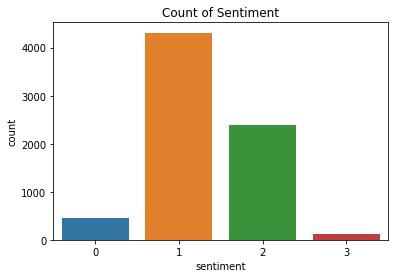

In [21]:
sns.countplot(x='sentiment', data=data_train)
plt.title('Count of Sentiment')
plt.show()

In [22]:
# Converting html entities
html_parser = HTMLParser()
print(type(dataframe['tweet'][0]))
dataframe['tweet'] = dataframe['tweet'].astype(str)
dataframe['tweet1'] = dataframe['tweet'].apply(lambda x: html_parser.unescape(x))
dataframe.head(15)

<class 'str'>


tweet_id                                              tweet  sentiment  \
0       1701  #sxswnui #sxsw #apple defining language of tou...          1   
1       1851  learning ab google doodles! all doodles should...          1   
2       2689  one of the most in-your-face ex. of stealing t...          2   
3       4525  this iphone #sxsw app would b pretty awesome i...          0   
4       3604  line outside the apple store in austin waiting...          1   
5        966  #technews one lone dude awaits ipad 2 at apple...          1   
6       1395  sxsw tips, prince, npr videos, toy shopping wi...          1   
7       8182  nu user rt @mention new #ubersocial for #iphon...          1   
8       8835     free #sxsw sampler on itunes {link} #freemusic          2   
9        883  i think i might go all weekend without seeing ...          2   
10      6398  rt @mention official #sxsw app û÷sxsw goûª b...          3   
11      2369  it's official! i'm buying an ipad. #sxsw #elevate          2   
12      3944  they're giving away ipad 2's, x boxes and book...          2   
13      6909  rt @mention we're officially at #sxsw! come by...          1   
14      7917  #companies to watch, from the #sxsw trade show...          1   

                                               tweet1  
0   #sxswnui #sxsw #apple defining language of tou...  
1   learning ab google doodles! all doodles should...  
2   one of the most in-your-face ex. of stealing t...  
3   this iphone #sxsw app would b pretty awesome i...  
4   line outside the apple store in austin waiting...  
5   #technews one lone dude awaits ipad 2 at apple...  
6   sxsw tips, prince, npr videos, toy shopping wi...  
7   nu user rt @mention new #ubersocial for #iphon...  
8      free #sxsw sampler on itunes {link} #freemusic  
9   i think i might go all weekend without seeing ...  
10  rt @mention official #sxsw app û÷sxsw goûª b...  
11  it's official! i'm buying an ipad. #sxsw #elevate  
12  they're giving away ipad 2's, x boxes and book...  
13  rt @mention we're officially at #sxsw! come by...  
14  #companies to watch, from the #sxsw trade show...

In [23]:
# Removing "@mention" from the tweets
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt
# remove user handles (@mention)
dataframe['tweet1'] = np.vectorize(remove_pattern)(dataframe['tweet1'], "@[\w]*")
dataframe.head(15)

tweet_id                                              tweet  sentiment  \
0       1701  #sxswnui #sxsw #apple defining language of tou...          1   
1       1851  learning ab google doodles! all doodles should...          1   
2       2689  one of the most in-your-face ex. of stealing t...          2   
3       4525  this iphone #sxsw app would b pretty awesome i...          0   
4       3604  line outside the apple store in austin waiting...          1   
5        966  #technews one lone dude awaits ipad 2 at apple...          1   
6       1395  sxsw tips, prince, npr videos, toy shopping wi...          1   
7       8182  nu user rt @mention new #ubersocial for #iphon...          1   
8       8835     free #sxsw sampler on itunes {link} #freemusic          2   
9        883  i think i might go all weekend without seeing ...          2   
10      6398  rt @mention official #sxsw app û÷sxsw goûª b...          3   
11      2369  it's official! i'm buying an ipad. #sxsw #elevate          2   
12      3944  they're giving away ipad 2's, x boxes and book...          2   
13      6909  rt @mention we're officially at #sxsw! come by...          1   
14      7917  #companies to watch, from the #sxsw trade show...          1   

                                               tweet1  
0   #sxswnui #sxsw #apple defining language of tou...  
1   learning ab google doodles! all doodles should...  
2   one of the most in-your-face ex. of stealing t...  
3   this iphone #sxsw app would b pretty awesome i...  
4   line outside the apple store in austin waiting...  
5   #technews one lone dude awaits ipad 2 at apple...  
6   sxsw tips, prince, npr videos, toy shopping wi...  
7   nu user rt  new #ubersocial for #iphone now in...  
8      free #sxsw sampler on itunes {link} #freemusic  
9   i think i might go all weekend without seeing ...  
10  rt  official #sxsw app û÷sxsw goûª bit.ly/hm...  
11  it's official! i'm buying an ipad. #sxsw #elevate  
12  they're giving away ipad 2's, x boxes and book...  
13  rt  we're officially at #sxsw! come by the  gr...  
14  #companies to watch, from the #sxsw trade show...

In [24]:
dataframe['tweet1'] = dataframe['tweet1'].apply(lambda x: x.lower())
dataframe.head()

tweet_id                                              tweet  sentiment  \
0      1701  #sxswnui #sxsw #apple defining language of tou...          1   
1      1851  learning ab google doodles! all doodles should...          1   
2      2689  one of the most in-your-face ex. of stealing t...          2   
3      4525  this iphone #sxsw app would b pretty awesome i...          0   
4      3604  line outside the apple store in austin waiting...          1   

                                              tweet1  
0  #sxswnui #sxsw #apple defining language of tou...  
1  learning ab google doodles! all doodles should...  
2  one of the most in-your-face ex. of stealing t...  
3  this iphone #sxsw app would b pretty awesome i...  
4  line outside the apple store in austin waiting...

In [25]:
# Apostrophe Dictionary
apostrophe_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}
apostrophe_dict

{"ain't": 'am not / are not',
 "aren't": 'are not / am not',
 "can't": 'cannot',
 "can't've": 'cannot have',
 "'cause": 'because',
 "could've": 'could have',
 "couldn't": 'could not',
 "couldn't've": 'could not have',
 "didn't": 'did not',
 "doesn't": 'does not',
 "don't": 'do not',
 "hadn't": 'had not',
 "hadn't've": 'had not have',
 "hasn't": 'has not',
 "haven't": 'have not',
 "he'd": 'he had / he would',
 "he'd've": 'he would have',
 "he'll": 'he shall / he will',
 "he'll've": 'he shall have / he will have',
 "he's": 'he has / he is',
 "how'd": 'how did',
 "how'd'y": 'how do you',
 "how'll": 'how will',
 "how's": 'how has / how is',
 "i'd": 'I had / I would',
 "i'd've": 'I would have',
 "i'll": 'I shall / I will',
 "i'll've": 'I shall have / I will have',
 "i'm": 'I am',
 "i've": 'I have',
 "isn't": 'is not',
 "it'd": 'it had / it would',
 "it'd've": 'it would have',
 "it'll": 'it shall / it will',
 "it'll've": 'it shall have / it will have',
 "it's": 'it has / it is',
 "let's": 'l

In [26]:
def lookup_dict(text, dictionary):
    for word in text.split():
        if word.lower() in dictionary:
            if word.lower() in text.split():
                text = text.replace(word, dictionary[word.lower()])
    return text
dataframe['tweet1'] = dataframe['tweet1'].apply(lambda x: lookup_dict(x,apostrophe_dict))
dataframe.head(10)

tweet_id                                              tweet  sentiment  \
0      1701  #sxswnui #sxsw #apple defining language of tou...          1   
1      1851  learning ab google doodles! all doodles should...          1   
2      2689  one of the most in-your-face ex. of stealing t...          2   
3      4525  this iphone #sxsw app would b pretty awesome i...          0   
4      3604  line outside the apple store in austin waiting...          1   
5       966  #technews one lone dude awaits ipad 2 at apple...          1   
6      1395  sxsw tips, prince, npr videos, toy shopping wi...          1   
7      8182  nu user rt @mention new #ubersocial for #iphon...          1   
8      8835     free #sxsw sampler on itunes {link} #freemusic          2   
9       883  i think i might go all weekend without seeing ...          2   

                                              tweet1  
0  #sxswnui #sxsw #apple defining language of tou...  
1  learning ab google doodles! all doodles should...  
2  one of the most in-your-face ex. of stealing t...  
3  this iphone #sxsw app would b pretty awesome i...  
4  line outside the apple store in austin waiting...  
5  #technews one lone dude awaits ipad 2 at apple...  
6  sxsw tips, prince, npr videos, toy shopping wi...  
7  nu user rt  new #ubersocial for #iphone now in...  
8     free #sxsw sampler on itunes {link} #freemusic  
9  i think i might go all weekend without seeing ...

In [27]:
# Short Word conversion
short_word_dict = {
"121": "one to one",
"a/s/l": "age, sex, location",
"adn": "any day now",
"afaik": "as far as I know",
"afk": "away from keyboard",
"aight": "alright",
"alol": "actually laughing out loud",
"b4": "before",
"b4n": "bye for now",
"bak": "back at the keyboard",
"bf": "boyfriend",
"bff": "best friends forever",
"bfn": "bye for now",
"bg": "big grin",
"bta": "but then again",
"btw": "by the way",
"cid": "crying in disgrace",
"cnp": "continued in my next post",
"cp": "chat post",
"cu": "see you",
"cul": "see you later",
"cul8r": "see you later",
"cya": "bye",
"cyo": "see you online",
"dbau": "doing business as usual",
"fud": "fear, uncertainty, and doubt",
"fwiw": "for what it's worth",
"fyi": "for your information",
"g": "grin",
"g2g": "got to go",
"ga": "go ahead",
"gal": "get a life",
"gf": "girlfriend",
"gfn": "gone for now",
"gmbo": "giggling my butt off",
"gmta": "great minds think alike",
"h8": "hate",
"hagn": "have a good night",
"hdop": "help delete online predators",
"hhis": "hanging head in shame",
"iac": "in any case",
"ianal": "I am not a lawyer",
"ic": "I see",
"idk": "I don't know",
"imao": "in my arrogant opinion",
"imnsho": "in my not so humble opinion",
"imo": "in my opinion",
"iow": "in other words",
"ipn": "I’m posting naked",
"irl": "in real life",
"jk": "just kidding",
"l8r": "later",
"ld": "later, dude",
"ldr": "long distance relationship",
"llta": "lots and lots of thunderous applause",
"lmao": "laugh my ass off",
"lmirl": "let's meet in real life",
"lol": "laugh out loud",
"ltr": "longterm relationship",
"lulab": "love you like a brother",
"lulas": "love you like a sister",
"luv": "love",
"m/f": "male or female",
"m8": "mate",
"milf": "mother I would like to fuck",
"oll": "online love",
"omg": "oh my god",
"otoh": "on the other hand",
"pir": "parent in room",
"ppl": "people",
"r": "are",
"rofl": "roll on the floor laughing",
"rpg": "role playing games",
"ru": "are you",
"shid": "slaps head in disgust",
"somy": "sick of me yet",
"sot": "short of time",
"thanx": "thanks",
"thx": "thanks",
"ttyl": "talk to you later",
"u": "you",
"ur": "you are",
"uw": "you’re welcome",
"wb": "welcome back",
"wfm": "works for me",
"wibni": "wouldn't it be nice if",
"wtf": "what the fuck",
"wtg": "way to go",
"wtgp": "want to go private",
"ym": "young man",
"gr8": "great"
}

In [28]:
dataframe['tweet1'] = dataframe['tweet1'].apply(lambda x: lookup_dict(x,short_word_dict))
dataframe.head(10)

tweet_id                                              tweet  sentiment  \
0      1701  #sxswnui #sxsw #apple defining language of tou...          1   
1      1851  learning ab google doodles! all doodles should...          1   
2      2689  one of the most in-your-face ex. of stealing t...          2   
3      4525  this iphone #sxsw app would b pretty awesome i...          0   
4      3604  line outside the apple store in austin waiting...          1   
5       966  #technews one lone dude awaits ipad 2 at apple...          1   
6      1395  sxsw tips, prince, npr videos, toy shopping wi...          1   
7      8182  nu user rt @mention new #ubersocial for #iphon...          1   
8      8835     free #sxsw sampler on itunes {link} #freemusic          2   
9       883  i think i might go all weekend without seeing ...          2   

                                              tweet1  
0  #sxswnui #sxsw #apple defining language of tou...  
1  learning ab google doodles! all doodles should...  
2  one of the most in-your-face ex. of stealing t...  
3  this iphone #sxsw app would b pretty awesome i...  
4  line outside the apple store in austin waiting...  
5  #technews one lone dude awaits ipad 2 at apple...  
6  sxsw tips, prince, npr videos, toy shopping wi...  
7  nu user rt  new #ubersocial for #iphone now in...  
8     free #sxsw sampler on itunes {link} #freemusic  
9  i think i might go all weekend without seeing ...

In [29]:
emoticon_dict = {
":)": "happy",
":‑)": "happy",
":-]": "happy",
":-3": "happy",
":->": "happy",
"8-)": "happy",
":-}": "happy",
":o)": "happy",
":c)": "happy",
":^)": "happy",
"=]": "happy",
"=)": "happy",
"<3": "happy",
":-(": "sad",
":(": "sad",
":c": "sad",
":<": "sad",
":[": "sad",
">:[": "sad",
":{": "sad",
">:(": "sad",
":-c": "sad",
":-< ": "sad",
":-[": "sad",
":-||": "sad"
}
emoticon_dict

{':)': 'happy',
 ':‑)': 'happy',
 ':-]': 'happy',
 ':-3': 'happy',
 ':->': 'happy',
 '8-)': 'happy',
 ':-}': 'happy',
 ':o)': 'happy',
 ':c)': 'happy',
 ':^)': 'happy',
 '=]': 'happy',
 '=)': 'happy',
 '<3': 'happy',
 ':-(': 'sad',
 ':(': 'sad',
 ':c': 'sad',
 ':<': 'sad',
 ':[': 'sad',
 '>:[': 'sad',
 ':{': 'sad',
 '>:(': 'sad',
 ':-c': 'sad',
 ':-< ': 'sad',
 ':-[': 'sad',
 ':-||': 'sad'}

In [30]:
dataframe['tweet1'] = dataframe['tweet1'].apply(lambda x: lookup_dict(x,emoticon_dict))
dataframe.head(10)

tweet_id                                              tweet  sentiment  \
0      1701  #sxswnui #sxsw #apple defining language of tou...          1   
1      1851  learning ab google doodles! all doodles should...          1   
2      2689  one of the most in-your-face ex. of stealing t...          2   
3      4525  this iphone #sxsw app would b pretty awesome i...          0   
4      3604  line outside the apple store in austin waiting...          1   
5       966  #technews one lone dude awaits ipad 2 at apple...          1   
6      1395  sxsw tips, prince, npr videos, toy shopping wi...          1   
7      8182  nu user rt @mention new #ubersocial for #iphon...          1   
8      8835     free #sxsw sampler on itunes {link} #freemusic          2   
9       883  i think i might go all weekend without seeing ...          2   

                                              tweet1  
0  #sxswnui #sxsw #apple defining language of tou...  
1  learning ab google doodles! all doodles should...  
2  one of the most in-your-face ex. of stealing t...  
3  this iphone #sxsw app would b pretty awesome i...  
4  line outside the apple store in austin waiting...  
5  #technews one lone dude awaits ipad 2 at apple...  
6  sxsw tips, prince, npr videos, toy shopping wi...  
7  nu user rt  new #ubersocial for #iphone now in...  
8     free #sxsw sampler on itunes {link} #freemusic  
9  i think i might go all weekend without seeing ...

In [31]:
def collectHashtag(x):
    hashtags = []    
    for i in x:        
        ht = re.findall(r"#(\w+)", i)        
        hashtags.append(ht)     
    return hashtags

In [32]:
#Collect all the hashtags in positive and negative tweets
HT_positive = collectHashtag(dataframe['tweet'][dataframe['sentiment'] == 0])
#Nested List to Un-nested List
HT_positive = sum(HT_positive,[])

HT_negative = collectHashtag(dataframe['tweet'][dataframe['sentiment'] == 2])
HT_negative = sum(HT_negative,[])

In [33]:
corpus_positive = nltk.FreqDist(HT_positive)
corpus_negative = nltk.FreqDist(HT_negative)
print(corpus_positive)
print(corpus_negative)

<FreqDist with 150 samples and 732 outcomes>
<FreqDist with 550 samples and 4009 outcomes>


In [34]:
d = pd.DataFrame({'Hashtag':list(corpus_positive.keys()),'Count':list(corpus_positive.values())})
d = d.nlargest(columns='Count',n=20)

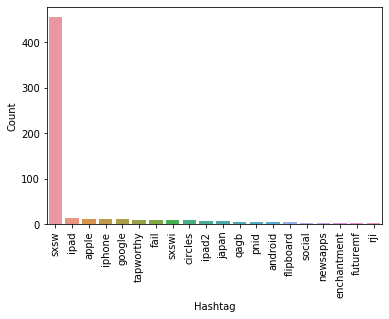

<Figure size 1152x360 with 0 Axes>

In [35]:
#Hashtags with positive sentiments
ax = sns.barplot(data = d,x = 'Hashtag',y = 'Count')
plt.figure(figsize=(16,5))
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

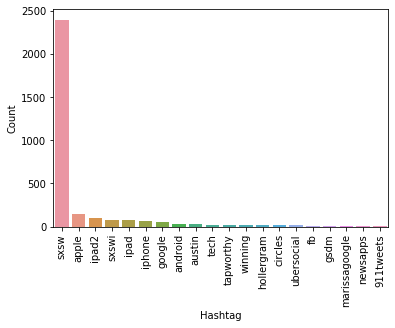

<Figure size 1152x360 with 0 Axes>

In [36]:
#Hashtags with negative sentiments
d = pd.DataFrame({'Hashtag':list(corpus_negative.keys()),'Count':list(corpus_negative.values())})
d = d.nlargest(columns='Count',n=20)

ax = sns.barplot(data = d,x = 'Hashtag',y = 'Count')
plt.figure(figsize=(16,5))
plt.setp(ax.get_xticklabels(), rotation=90)

plt.show()

In [37]:
def remove_punctuations(text):
    no_punc = "".join([c for c in text if c not in string.punctuation])
    return no_punc
dataframe['tweet1'] = dataframe['tweet1'].apply(lambda x : remove_punctuations(x))
dataframe.head(10)

tweet_id                                              tweet  sentiment  \
0      1701  #sxswnui #sxsw #apple defining language of tou...          1   
1      1851  learning ab google doodles! all doodles should...          1   
2      2689  one of the most in-your-face ex. of stealing t...          2   
3      4525  this iphone #sxsw app would b pretty awesome i...          0   
4      3604  line outside the apple store in austin waiting...          1   
5       966  #technews one lone dude awaits ipad 2 at apple...          1   
6      1395  sxsw tips, prince, npr videos, toy shopping wi...          1   
7      8182  nu user rt @mention new #ubersocial for #iphon...          1   
8      8835     free #sxsw sampler on itunes {link} #freemusic          2   
9       883  i think i might go all weekend without seeing ...          2   

                                              tweet1  
0  sxswnui sxsw apple defining language of touch ...  
1  learning ab google doodles all doodles should ...  
2  one of the most inyourface ex of stealing the ...  
3  this iphone sxsw app would b pretty awesome if...  
4  line outside the apple store in austin waiting...  
5  technews one lone dude awaits ipad 2 at apple...  
6  sxsw tips prince npr videos toy shopping with ...  
7  nu user rt  new ubersocial for iphone now in t...  
8         free sxsw sampler on itunes link freemusic  
9  i think i might go all weekend without seeing ...

In [38]:
# Replacing Punctuations with space
dataframe['tweet1'] = dataframe['tweet1'].apply(lambda x: re.sub(r'[^\w\s]',' ',x))
dataframe.head(10)

tweet_id                                              tweet  sentiment  \
0      1701  #sxswnui #sxsw #apple defining language of tou...          1   
1      1851  learning ab google doodles! all doodles should...          1   
2      2689  one of the most in-your-face ex. of stealing t...          2   
3      4525  this iphone #sxsw app would b pretty awesome i...          0   
4      3604  line outside the apple store in austin waiting...          1   
5       966  #technews one lone dude awaits ipad 2 at apple...          1   
6      1395  sxsw tips, prince, npr videos, toy shopping wi...          1   
7      8182  nu user rt @mention new #ubersocial for #iphon...          1   
8      8835     free #sxsw sampler on itunes {link} #freemusic          2   
9       883  i think i might go all weekend without seeing ...          2   

                                              tweet1  
0  sxswnui sxsw apple defining language of touch ...  
1  learning ab google doodles all doodles should ...  
2  one of the most inyourface ex of stealing the ...  
3  this iphone sxsw app would b pretty awesome if...  
4  line outside the apple store in austin waiting...  
5  technews one lone dude awaits ipad 2 at apple ...  
6  sxsw tips prince npr videos toy shopping with ...  
7  nu user rt  new ubersocial for iphone now in t...  
8         free sxsw sampler on itunes link freemusic  
9  i think i might go all weekend without seeing ...

In [39]:
# Replacing Special Characters with space
dataframe['tweet1'] = dataframe['tweet1'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]',' ',x))
dataframe.head(10)

tweet_id                                              tweet  sentiment  \
0      1701  #sxswnui #sxsw #apple defining language of tou...          1   
1      1851  learning ab google doodles! all doodles should...          1   
2      2689  one of the most in-your-face ex. of stealing t...          2   
3      4525  this iphone #sxsw app would b pretty awesome i...          0   
4      3604  line outside the apple store in austin waiting...          1   
5       966  #technews one lone dude awaits ipad 2 at apple...          1   
6      1395  sxsw tips, prince, npr videos, toy shopping wi...          1   
7      8182  nu user rt @mention new #ubersocial for #iphon...          1   
8      8835     free #sxsw sampler on itunes {link} #freemusic          2   
9       883  i think i might go all weekend without seeing ...          2   

                                              tweet1  
0  sxswnui sxsw apple defining language of touch ...  
1  learning ab google doodles all doodles should ...  
2  one of the most inyourface ex of stealing the ...  
3  this iphone sxsw app would b pretty awesome if...  
4  line outside the apple store in austin waiting...  
5  technews one lone dude awaits ipad 2 at apple ...  
6  sxsw tips prince npr videos toy shopping with ...  
7  nu user rt  new ubersocial for iphone now in t...  
8         free sxsw sampler on itunes link freemusic  
9  i think i might go all weekend without seeing ...

In [40]:
# Replacing Numbers with space
dataframe['tweet1'] = dataframe['tweet1'].apply(lambda x: re.sub(r'[^a-zA-Z]',' ',x))
dataframe.head(10)

tweet_id                                              tweet  sentiment  \
0      1701  #sxswnui #sxsw #apple defining language of tou...          1   
1      1851  learning ab google doodles! all doodles should...          1   
2      2689  one of the most in-your-face ex. of stealing t...          2   
3      4525  this iphone #sxsw app would b pretty awesome i...          0   
4      3604  line outside the apple store in austin waiting...          1   
5       966  #technews one lone dude awaits ipad 2 at apple...          1   
6      1395  sxsw tips, prince, npr videos, toy shopping wi...          1   
7      8182  nu user rt @mention new #ubersocial for #iphon...          1   
8      8835     free #sxsw sampler on itunes {link} #freemusic          2   
9       883  i think i might go all weekend without seeing ...          2   

                                              tweet1  
0  sxswnui sxsw apple defining language of touch ...  
1  learning ab google doodles all doodles should ...  
2  one of the most inyourface ex of stealing the ...  
3  this iphone sxsw app would b pretty awesome if...  
4  line outside the apple store in austin waiting...  
5  technews one lone dude awaits ipad   at apple ...  
6  sxsw tips prince npr videos toy shopping with ...  
7  nu user rt  new ubersocial for iphone now in t...  
8         free sxsw sampler on itunes link freemusic  
9  i think i might go all weekend without seeing ...

In [41]:
# Removing words of length 1
dataframe['tweet1'] = dataframe['tweet1'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))
dataframe.head()

tweet_id                                              tweet  sentiment  \
0      1701  #sxswnui #sxsw #apple defining language of tou...          1   
1      1851  learning ab google doodles! all doodles should...          1   
2      2689  one of the most in-your-face ex. of stealing t...          2   
3      4525  this iphone #sxsw app would b pretty awesome i...          0   
4      3604  line outside the apple store in austin waiting...          1   

                                              tweet1  
0  sxswnui sxsw apple defining language of touch ...  
1  learning ab google doodles all doodles should ...  
2  one of the most inyourface ex of stealing the ...  
3  this iphone sxsw app would pretty awesome if i...  
4  line outside the apple store in austin waiting...

In [42]:
# Addition of New features
dataframe['polarity'] = dataframe['tweet1'].map(lambda text: TextBlob(text).sentiment.polarity)
dataframe['tweet_len'] = dataframe['tweet1'].astype(str).apply(len)
dataframe['tweet_word_count'] = dataframe['tweet1'].apply(lambda x: len(str(x).split()))
dataframe.head(5)

tweet_id                                              tweet  sentiment  \
0      1701  #sxswnui #sxsw #apple defining language of tou...          1   
1      1851  learning ab google doodles! all doodles should...          1   
2      2689  one of the most in-your-face ex. of stealing t...          2   
3      4525  this iphone #sxsw app would b pretty awesome i...          0   
4      3604  line outside the apple store in austin waiting...          1   

                                              tweet1  polarity  tweet_len  \
0  sxswnui sxsw apple defining language of touch ...  0.150000         86   
1  learning ab google doodles all doodles should ...  0.381250        131   
2  one of the most inyourface ex of stealing the ...  0.500000        103   
3  this iphone sxsw app would pretty awesome if i...  0.625000        118   
4  line outside the apple store in austin waiting...  0.068182         73   

   tweet_word_count  
0                12  
1                18  
2                21  
3                19  
4                14

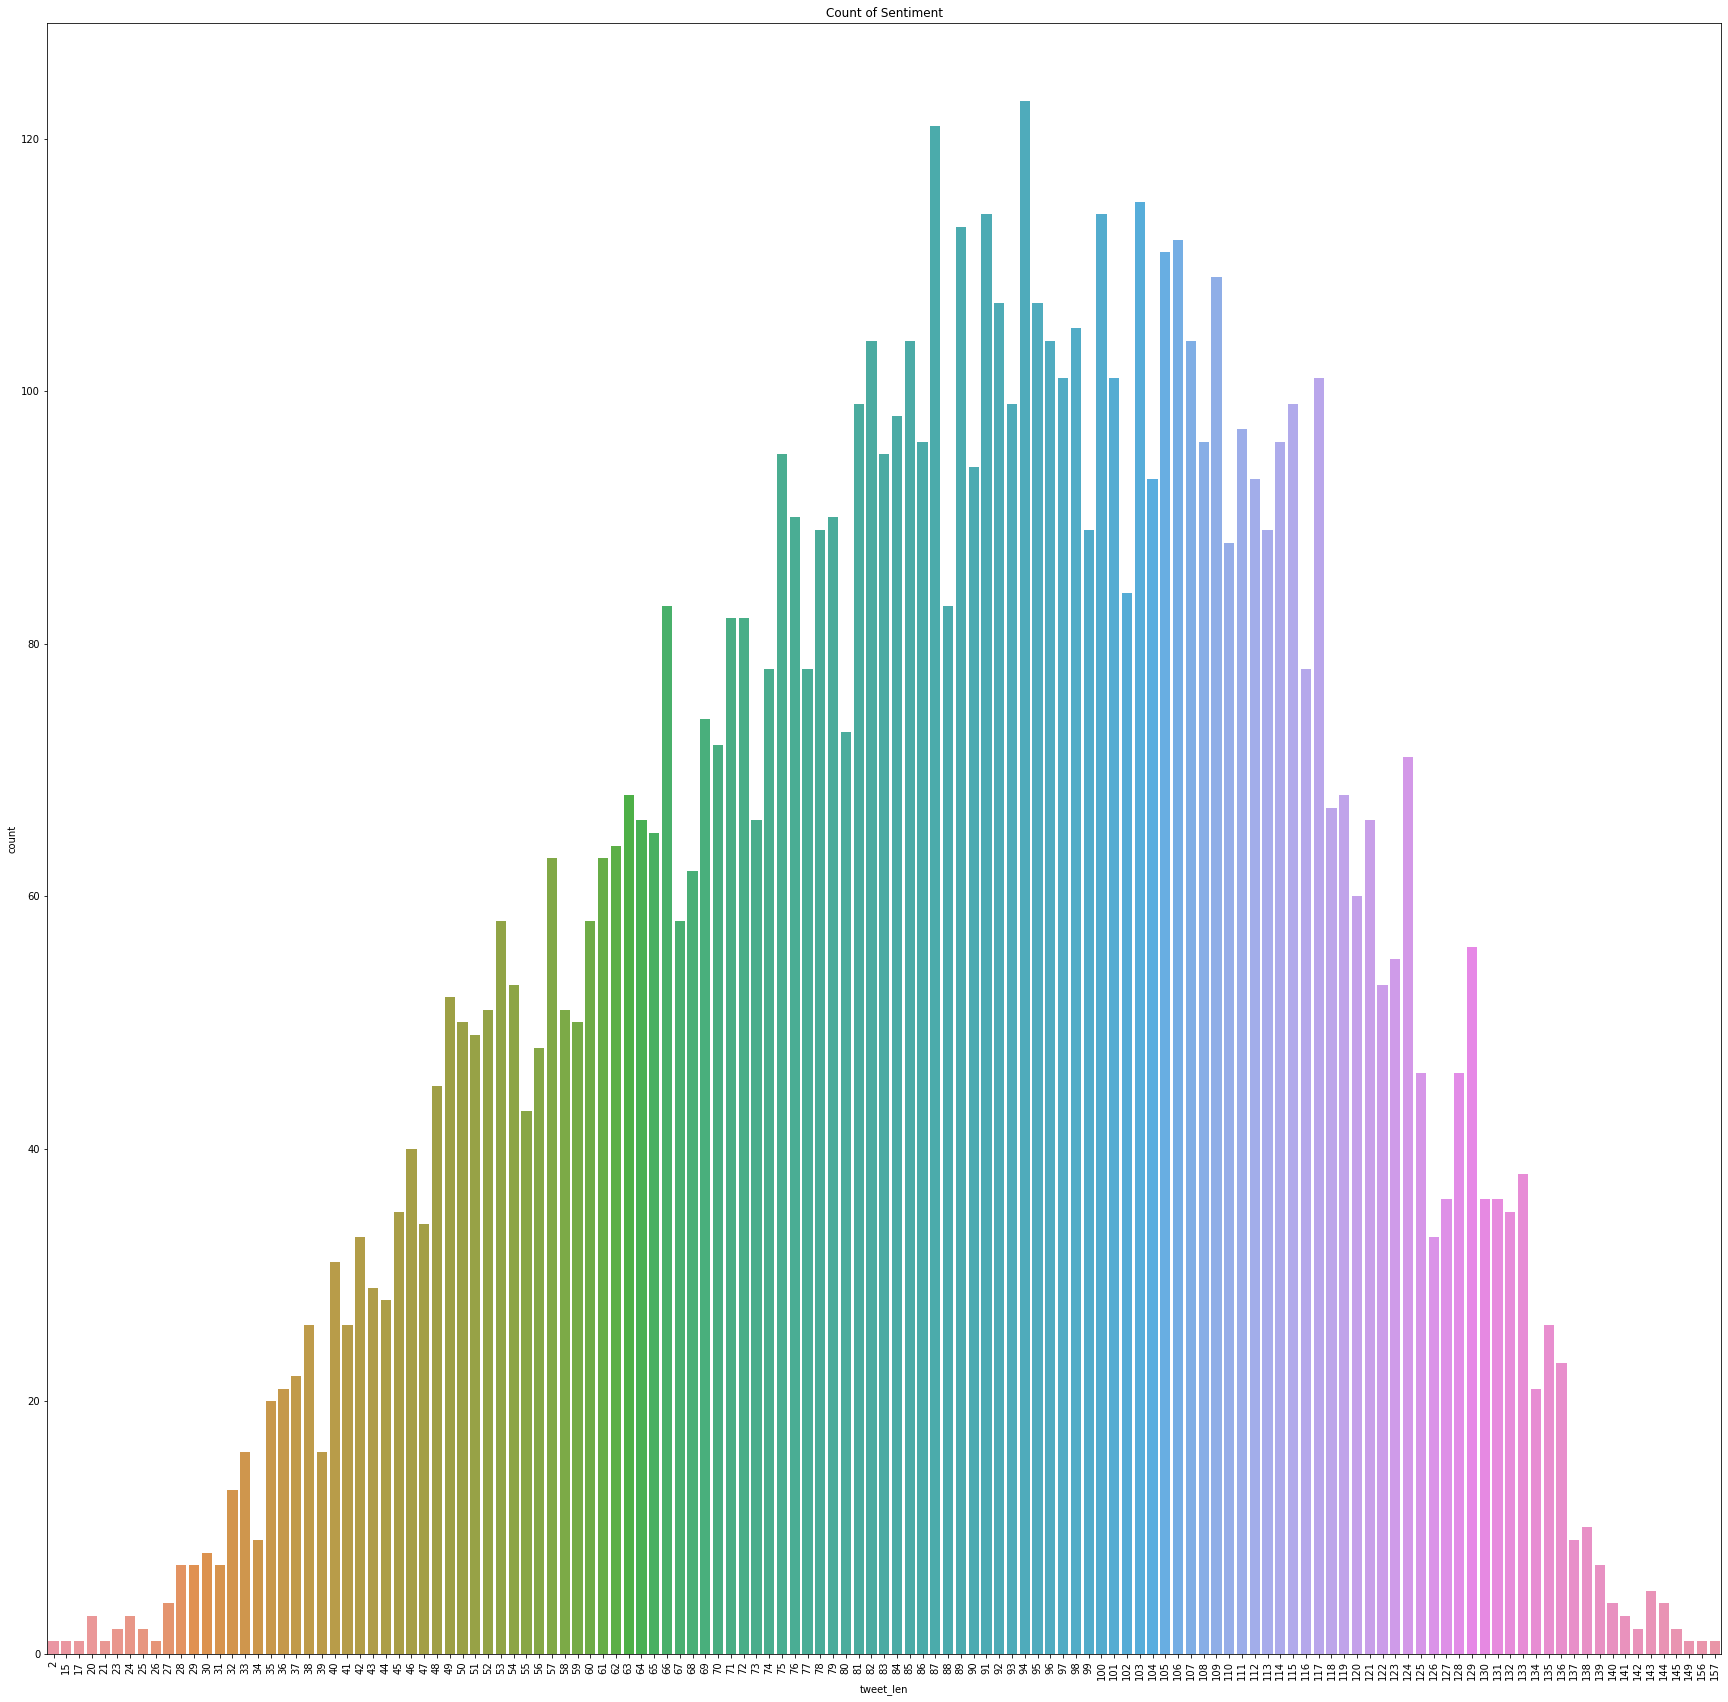

In [43]:
# Creating new dataframe for graphs
new_train = dataframe[dataframe['sentiment'] != 10]
plt.figure(figsize=(30,30))
sns.countplot(x='tweet_len', data=new_train)
plt.xticks(rotation = 90)
plt.title('Count of Sentiment')
plt.show()

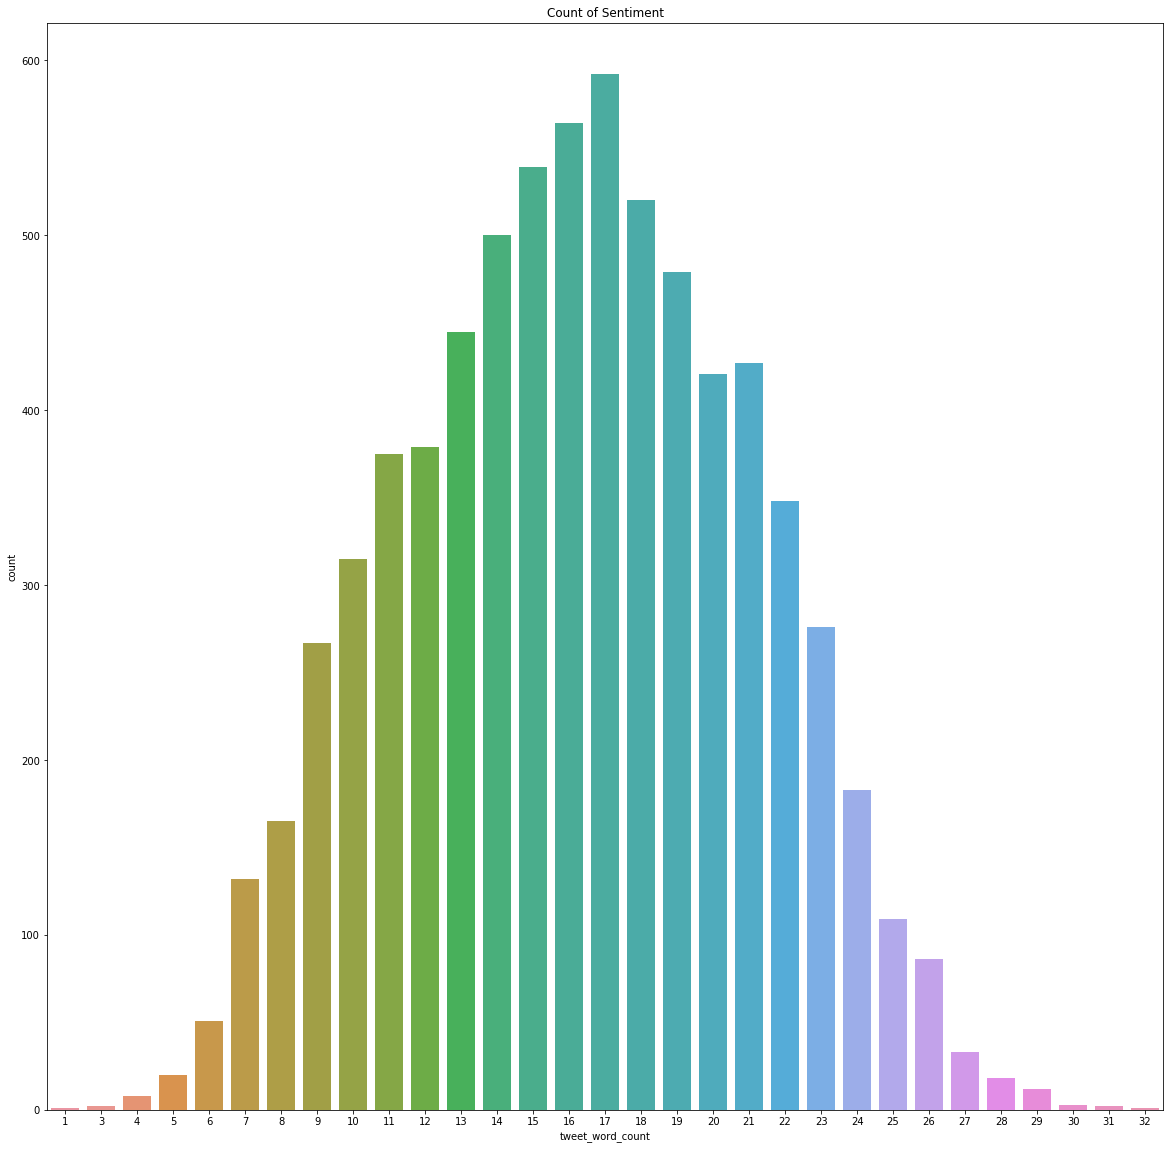

In [44]:
plt.figure(figsize=(20,20))
sns.countplot(x='tweet_word_count', data=new_train)
plt.title('Count of Sentiment')
plt.show()

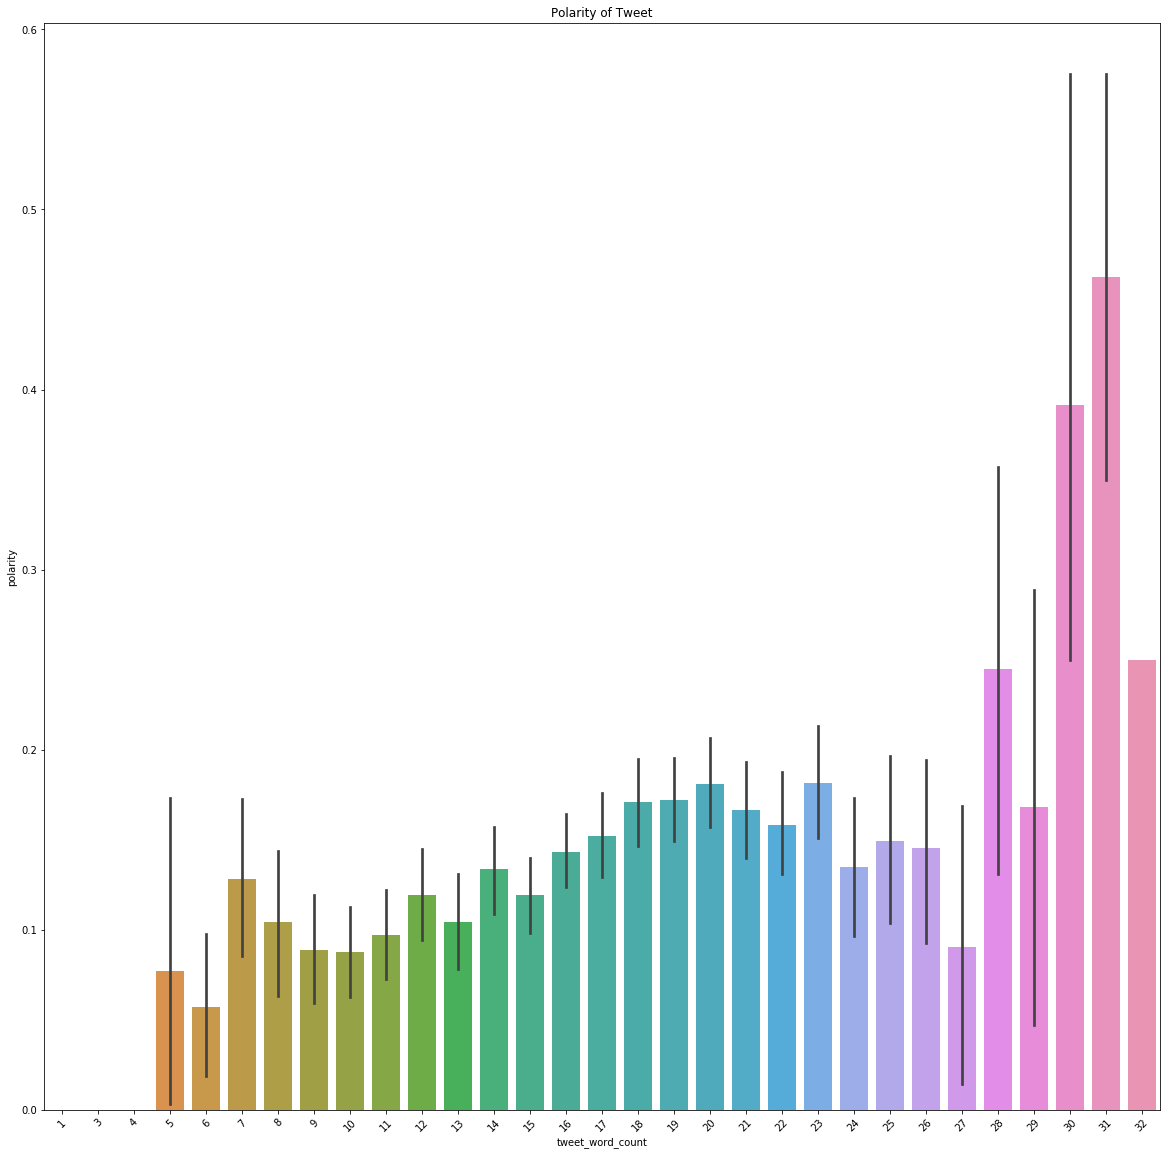

In [45]:
plt.figure(figsize=(20,20))
sns.barplot(x='tweet_word_count',y='polarity', data=new_train)
plt.xticks(rotation = 45)
plt.title('Polarity of Tweet')
plt.show()

In [46]:
text = dataframe['tweet1'][0:10].apply(lambda x: str(TextBlob(x).correct()))
text

0    sxswnui saw apple defining language of touch w...
1    learning ab goose doubles all doubles should b...
2    one of the most inyourface ex of stealing the ...
3    this phone saw pp would pretty awesome if it d...
4    line outside the apple store in austin waiting...
5    technews one lone due awaits pad at apple saw ...
6    saw tips prince nor video toy shopping with zu...
7    no user it new ubersocial for phone now in the...
8             free saw simpler on tunes link freemusic
9    think might go all weekend without seeing the ...
Name: tweet1, dtype: object

In [47]:
dataframe['tweet2'] = dataframe['tweet1'].apply(lambda x : word_tokenize(x))
dataframe.head(5)

tweet_id                                              tweet  sentiment  \
0      1701  #sxswnui #sxsw #apple defining language of tou...          1   
1      1851  learning ab google doodles! all doodles should...          1   
2      2689  one of the most in-your-face ex. of stealing t...          2   
3      4525  this iphone #sxsw app would b pretty awesome i...          0   
4      3604  line outside the apple store in austin waiting...          1   

                                              tweet1  polarity  tweet_len  \
0  sxswnui sxsw apple defining language of touch ...  0.150000         86   
1  learning ab google doodles all doodles should ...  0.381250        131   
2  one of the most inyourface ex of stealing the ...  0.500000        103   
3  this iphone sxsw app would pretty awesome if i...  0.625000        118   
4  line outside the apple store in austin waiting...  0.068182         73   

   tweet_word_count                                             tweet2  
0                12  [sxswnui, sxsw, apple, defining, language, of,...  
1                18  [learning, ab, google, doodles, all, doodles, ...  
2                21  [one, of, the, most, inyourface, ex, of, steal...  
3                19  [this, iphone, sxsw, app, would, pretty, aweso...  
4                14  [line, outside, the, apple, store, in, austin,...

In [48]:
# Importing stop words from NLTK corpus for english language
stop_words = set(stopwords.words('english'))

In [49]:
# Created new columns of tokens - where stop words are being removed
dataframe['tweet_filtered'] = dataframe['tweet2'].apply(lambda x: [word for word in x if not word in stop_words])

## Tokens columns with stop words and without stop words
dataframe[['tweet2', 'tweet_filtered']].head(10)

tweet2  \
0  [sxswnui, sxsw, apple, defining, language, of,...   
1  [learning, ab, google, doodles, all, doodles, ...   
2  [one, of, the, most, inyourface, ex, of, steal...   
3  [this, iphone, sxsw, app, would, pretty, aweso...   
4  [line, outside, the, apple, store, in, austin,...   
5  [technews, one, lone, dude, awaits, ipad, at, ...   
6  [sxsw, tips, prince, npr, videos, toy, shoppin...   
7  [nu, user, rt, new, ubersocial, for, iphone, n...   
8  [free, sxsw, sampler, on, itunes, link, freemu...   
9  [think, might, go, all, weekend, without, seei...   

                                      tweet_filtered  
0  [sxswnui, sxsw, apple, defining, language, tou...  
1  [learning, ab, google, doodles, doodles, light...  
2  [one, inyourface, ex, stealing, show, yrs, rt,...  
3  [iphone, sxsw, app, would, pretty, awesome, cr...  
4  [line, outside, apple, store, austin, waiting,...  
5  [technews, one, lone, dude, awaits, ipad, appl...  
6  [sxsw, tips, prince, npr, videos, toy, shoppin...  
7  [nu, user, rt, new, ubersocial, iphone, app, s...  
8     [free, sxsw, sampler, itunes, link, freemusic]  
9  [think, might, go, weekend, without, seeing, i...

In [50]:
stemming = PorterStemmer()
# Created one more columns tweet_stemmed it shows tweets' stemmed version
dataframe['tweet_stemmed'] = dataframe['tweet_filtered'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))
dataframe['tweet_stemmed'].head(10)

0    sxswnui sxsw appl defin languag touch differ d...
1    learn ab googl doodl doodl light funni innov e...
2    one inyourfac ex steal show yr rt sxsw appl sc...
3    iphon sxsw app would pretti awesom crash everi...
4    line outsid appl store austin wait new ipad sx...
5    technew one lone dude await ipad appl sxsw sto...
6    sxsw tip princ npr video toy shop zuckerberg l...
7    nu user rt new ubersoci iphon app store includ...
8                  free sxsw sampler itun link freemus
9    think might go weekend without see ipad case t...
Name: tweet_stemmed, dtype: object

In [51]:
lemmatizing = WordNetLemmatizer()
# Created one more columns tweet_lemmatized it shows tweets' lemmatized version
dataframe['tweet_lemmatized'] = dataframe['tweet_filtered'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))
dataframe['tweet_lemmatized'].head(10)

0    sxswnui sxsw apple defining language touch dif...
1    learning ab google doodle doodle light funny i...
2    one inyourface ex stealing show yr rt sxsw app...
3    iphone sxsw app would pretty awesome crash eve...
4    line outside apple store austin waiting new ip...
5    technews one lone dude awaits ipad apple sxsw ...
6    sxsw tip prince npr video toy shopping zuckerb...
7    nu user rt new ubersocial iphone app store inc...
8              free sxsw sampler itunes link freemusic
9    think might go weekend without seeing ipad cas...
Name: tweet_lemmatized, dtype: object

In [52]:
dataframe.head(10)

tweet_id                                              tweet  sentiment  \
0      1701  #sxswnui #sxsw #apple defining language of tou...          1   
1      1851  learning ab google doodles! all doodles should...          1   
2      2689  one of the most in-your-face ex. of stealing t...          2   
3      4525  this iphone #sxsw app would b pretty awesome i...          0   
4      3604  line outside the apple store in austin waiting...          1   
5       966  #technews one lone dude awaits ipad 2 at apple...          1   
6      1395  sxsw tips, prince, npr videos, toy shopping wi...          1   
7      8182  nu user rt @mention new #ubersocial for #iphon...          1   
8      8835     free #sxsw sampler on itunes {link} #freemusic          2   
9       883  i think i might go all weekend without seeing ...          2   

                                              tweet1  polarity  tweet_len  \
0  sxswnui sxsw apple defining language of touch ...  0.150000         86   
1  learning ab google doodles all doodles should ...  0.381250        131   
2  one of the most inyourface ex of stealing the ...  0.500000        103   
3  this iphone sxsw app would pretty awesome if i...  0.625000        118   
4  line outside the apple store in austin waiting...  0.068182         73   
5  technews one lone dude awaits ipad at apple sx...  0.000000         97   
6  sxsw tips prince npr videos toy shopping with ...  0.000000         71   
7  nu user rt new ubersocial for iphone now in th...  0.136364        106   
8         free sxsw sampler on itunes link freemusic  0.400000         42   
9  think might go all weekend without seeing the ...  0.000000         71   

   tweet_word_count                                             tweet2  \
0                12  [sxswnui, sxsw, apple, defining, language, of,...   
1                18  [learning, ab, google, doodles, all, doodles, ...   
2                21  [one, of, the, most, inyourface, ex, of, steal...   
3                19  [this, iphone, sxsw, app, would, pretty, aweso...   
4                14  [line, outside, the, apple, store, in, austin,...   
5                17  [technews, one, lone, dude, awaits, ipad, at, ...   
6                12  [sxsw, tips, prince, npr, videos, toy, shoppin...   
7                19  [nu, user, rt, new, ubersocial, for, iphone, n...   
8                 7  [free, sxsw, sampler, on, itunes, link, freemu...   
9                13  [think, might, go, all, weekend, without, seei...   

                                      tweet_filtered  \
0  [sxswnui, sxsw, apple, defining, language, tou...   
1  [learning, ab, google, doodles, doodles, light...   
2  [one, inyourface, ex, stealing, show, yrs, rt,...   
3  [iphone, sxsw, app, would, pretty, awesome, cr...   
4  [line, outside, apple, store, austin, waiting,...   
5  [technews, one, lone, dude, awaits, ipad, appl...   
6  [sxsw, tips, prince, npr, videos, toy, shoppin...   
7  [nu, user, rt, new, ubersocial, iphone, app, s...   
8     [free, sxsw, sampler, itunes, link, freemusic]   
9  [think, might, go, weekend, without, seeing, i...   

                                       tweet_stemmed  \
0  sxswnui sxsw appl defin languag touch differ d...   
1  learn ab googl doodl doodl light funni innov e...   
2  one inyourfac ex steal show yr rt sxsw appl sc...   
3  iphon sxsw app would pretti awesom crash everi...   
4  line outsid appl store austin wait new ipad sx...   
5  technew one lone dude await ipad appl sxsw sto...   
6  sxsw tip princ npr video toy shop zuckerberg l...   
7  nu user rt new ubersoci iphon app store includ...   
8                free sxsw sampler itun link freemus   
9  think might go weekend without see ipad case t...   

                                    tweet_lemmatized  
0  sxswnui sxsw apple defining language touch dif...  
1  learning ab google doodle doodle light funny i...  
2  one inyourface ex stealing show yr rt sxsw app...  
3  iphone sxsw app would pretty awesom

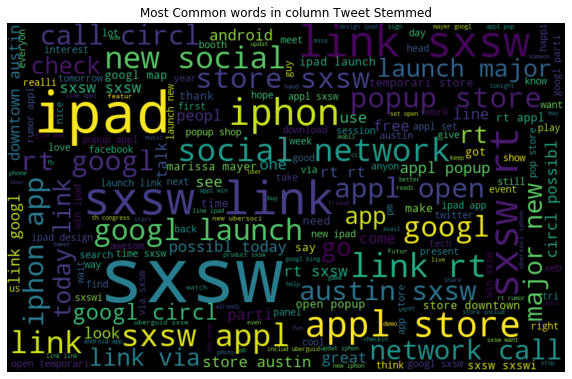

In [53]:
# most commonly used words in "tweet_stemmed"
#visualizing all the words in column "tweet_stemmed" in our data using the wordcloud plot.
# Also we will plotting only for train data
new_train = dataframe[dataframe['sentiment'] != 10]
all_words = ' '.join([text for text in new_train['tweet_stemmed']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column Tweet Stemmed")
plt.show()

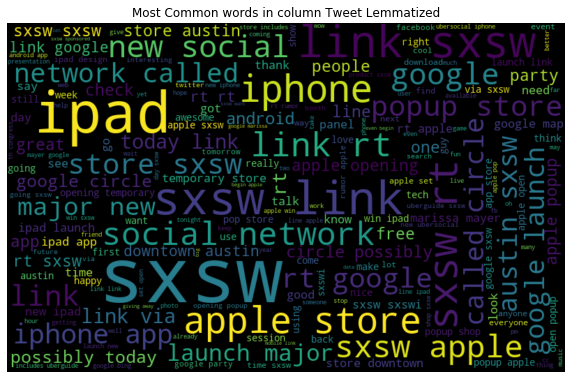

In [54]:
# most commonly used words in "tweet_lemmatized"
#Visualizing all the words in column "tweet_lemmatized" in our data using the wordcloud plot.
# Also we will plotting only for train data
all_words = ' '.join([text for text in new_train['tweet_lemmatized']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column Tweet Lemmatized")
plt.show()

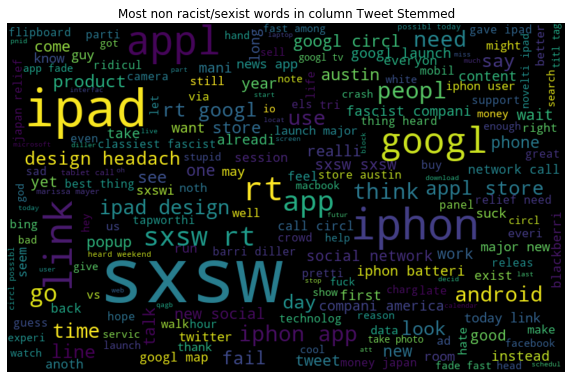

In [55]:
# Most common words in negative
#Visualizing all the normal or non racist/sexist words in column "tweet_stemmed" in our data using the wordcloud plot.
neg_words =' '.join([text for text in new_train['tweet_stemmed'][dataframe['sentiment'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neg_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most non racist/sexist words in column Tweet Stemmed")
plt.show()

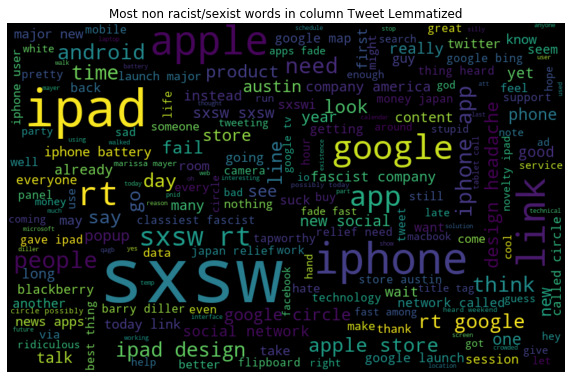

In [56]:
#Visualizing all the normal or non racist/sexist words in column "tweet_lemmatized" in our data using the wordcloud plot.
neg_words =' '.join([text for text in new_train['tweet_lemmatized'][dataframe['sentiment'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neg_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most non racist/sexist words in column Tweet Lemmatized")
plt.show()

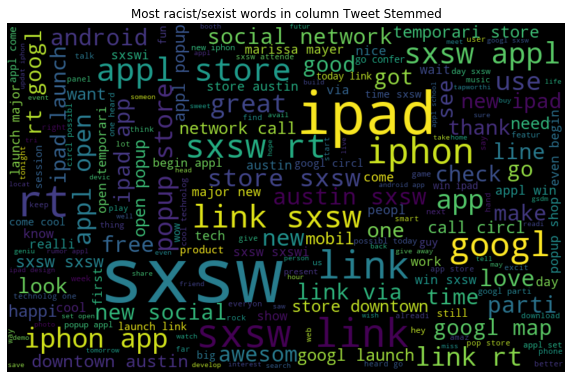

In [57]:
# Most common words in positive
#Visualizing all the negative or racist/sexist words in column "tweet_stemmed" in our data using the wordcloud plot.
pos_words =' '.join([text for text in new_train['tweet_stemmed'][dataframe['sentiment'] == 2]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(pos_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most racist/sexist words in column Tweet Stemmed")
plt.show()

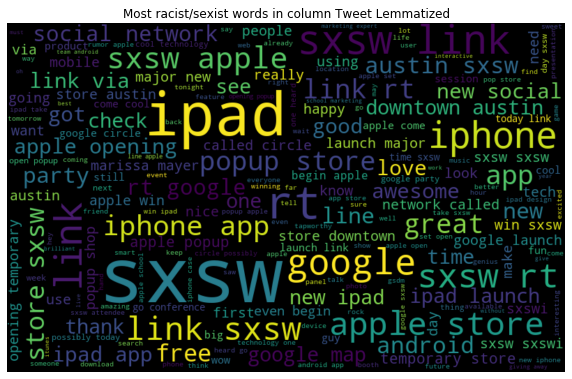

In [58]:
#Visualizing all the negative or racist/sexist words in column "tweet_lemmatized" in our data using the wordcloud plot.
pos_words =' '.join([text for text in new_train['tweet_lemmatized'][dataframe['sentiment'] == 2]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(pos_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most racist/sexist words in column Tweet Lemmatized")
plt.show()

In [59]:
#Initialising a CountVectorizer object
text = new_train['tweet1']
count_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# count_vectorizer.fit(text)
vector = count_vectorizer.fit_transform(text)
# print(vector)
print(vector)
# print(vector.toarray())

  (0, 226)	1
  (0, 896)	1
  (0, 31)	1
  (1, 350)	1
  (1, 326)	1
  (1, 489)	1
  (1, 242)	2
  (1, 347)	1
  (1, 483)	1
  (2, 495)	1
  (2, 282)	1
  (2, 748)	1
  (2, 724)	1
  (2, 31)	1
  (3, 561)	1
  (3, 225)	1
  (3, 53)	1
  (3, 667)	1
  (3, 29)	1
  (3, 445)	1
  (4, 443)	1
  (4, 592)	1
  (4, 951)	1
  (4, 48)	1
  (4, 827)	1
  :	:
  (7268, 107)	1
  (7268, 347)	1
  (7269, 595)	1
  (7269, 580)	1
  (7269, 258)	1
  (7269, 849)	1
  (7269, 765)	1
  (7269, 495)	1
  (7269, 724)	1
  (7270, 102)	1
  (7270, 991)	1
  (7270, 722)	2
  (7270, 495)	1
  (7270, 724)	1
  (7270, 347)	1
  (7271, 477)	1
  (7271, 459)	1
  (7271, 216)	1
  (7271, 320)	1
  (7271, 443)	1
  (7271, 29)	1
  (7271, 495)	1
  (7272, 949)	2
  (7272, 569)	1
  (7272, 31)	1


In [60]:
# bag-of-words feature matrix - For columns "combine_df['tweet_stemmed']"
bow_stem = count_vectorizer.fit_transform(new_train['tweet_stemmed'])
print(bow_stem)

  (0, 78)	1
  (0, 229)	1
  (0, 901)	1
  (0, 39)	1
  (1, 365)	1
  (1, 444)	1
  (1, 341)	1
  (1, 503)	1
  (1, 245)	2
  (1, 362)	1
  (1, 0)	1
  (1, 497)	1
  (2, 506)	1
  (2, 291)	1
  (2, 757)	1
  (2, 740)	1
  (2, 997)	1
  (2, 39)	1
  (3, 565)	1
  (3, 279)	1
  (3, 194)	1
  (3, 59)	1
  (3, 666)	1
  (3, 36)	1
  (3, 459)	1
  :	:
  (7269, 582)	1
  (7269, 263)	1
  (7269, 854)	1
  (7269, 771)	1
  (7269, 506)	1
  (7269, 740)	1
  (7270, 112)	1
  (7270, 738)	2
  (7270, 989)	1
  (7270, 506)	1
  (7270, 740)	1
  (7270, 362)	1
  (7271, 264)	1
  (7271, 492)	1
  (7271, 334)	1
  (7271, 458)	1
  (7271, 36)	1
  (7271, 506)	1
  (7272, 176)	1
  (7272, 66)	1
  (7272, 894)	1
  (7272, 768)	1
  (7272, 951)	2
  (7272, 571)	1
  (7272, 39)	1


In [61]:
# bag-of-words feature matrix - For column - combine_df['tweet_lemmatized']
bow_lemm = count_vectorizer.fit_transform(new_train['tweet_lemmatized'])
print(bow_lemm)

  (0, 230)	1
  (0, 896)	1
  (0, 37)	1
  (1, 357)	1
  (1, 331)	1
  (1, 499)	1
  (1, 243)	2
  (1, 354)	1
  (1, 0)	1
  (1, 492)	1
  (2, 504)	1
  (2, 284)	1
  (2, 749)	1
  (2, 727)	1
  (2, 996)	1
  (2, 37)	1
  (3, 565)	1
  (3, 58)	1
  (3, 670)	1
  (3, 34)	1
  (3, 450)	1
  (4, 448)	1
  (4, 598)	1
  (4, 946)	1
  (4, 53)	1
  :	:
  (7268, 115)	1
  (7268, 354)	1
  (7269, 601)	1
  (7269, 584)	1
  (7269, 262)	1
  (7269, 850)	1
  (7269, 764)	1
  (7269, 504)	1
  (7269, 727)	1
  (7270, 110)	1
  (7270, 725)	2
  (7270, 987)	1
  (7270, 504)	1
  (7270, 727)	1
  (7270, 354)	1
  (7271, 485)	1
  (7271, 326)	1
  (7271, 448)	1
  (7271, 34)	1
  (7271, 504)	1
  (7272, 182)	1
  (7272, 65)	1
  (7272, 890)	1
  (7272, 573)	1
  (7272, 37)	1


In [62]:
# create the transform
vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# tokenize and build vocab
# vectorizer.fit(text)
vector1 = vectorizer.fit_transform(text)
# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)
# encode document
# summarize encoded vector
print(vector1)
print(vector1.shape)
print(vector1.toarray())

{'apple': 31, 'touch': 896, 'different': 226, 'learning': 483, 'google': 347, 'doodles': 242, 'light': 489, 'funny': 326, 'googledoodle': 350, 'rt': 724, 'schools': 748, 'experts': 282, 'link': 495, 'iphone': 445, 'app': 29, 'pretty': 667, 'awesome': 53, 'did': 225, 'mins': 561, 'line': 493, 'outside': 613, 'store': 827, 'austin': 48, 'waiting': 951, 'new': 592, 'ipad': 443, 'technews': 863, 'dude': 253, 'tablets': 851, 'tech': 861, 'user': 931, 'ubersocial': 921, 'includes': 424, 'uberguide': 920, 'sponsored': 806, 'mashable': 543, 'free': 320, 'sampler': 734, 'itunes': 449, 'think': 878, 'weekend': 966, 'seeing': 755, 'case': 121, 'official': 601, 'android': 23, 'buying': 110, 'giving': 340, 'away': 52, 'officially': 602, 'come': 159, 'mention': 552, 'll': 501, 'make': 530, 'companies': 164, 'watch': 958, 'trade': 901, 'floor': 311, 'apps': 33, 'features': 300, 'marissa': 538, 'mayer': 545, 'future': 327, 'location': 503, 'augmented': 47, 'reality': 700, 'contextual': 180, 'discovery

In [63]:
# TF-IDF feature matrix - For columns "train['tweet_stemmed']"
tfidf_stem_train = vectorizer.fit_transform(new_train['tweet_stemmed'])
tfidf_stem_train

<7273x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 52594 stored elements in Compressed Sparse Row format>

In [64]:
# TF-IDF feature matrix - For columns "test['tweet_stemmed']"
new_test = dataframe[dataframe['sentiment'] == 10]
tfidf_stem_test = vectorizer.fit_transform(new_test['tweet_stemmed'])
tfidf_stem_test

<1819x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 13524 stored elements in Compressed Sparse Row format>

In [65]:
# TF-IDF feature matrix - For columns "combine_df['tweet_lemmatized']"
tfidf_lemm_train = vectorizer.fit_transform(new_train['tweet_lemmatized'])
tfidf_lemm_train

<7273x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 50433 stored elements in Compressed Sparse Row format>

In [66]:
tfidf_lemm_test = vectorizer.fit_transform(new_test['tweet_lemmatized'])
tfidf_lemm_test

<1819x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 13059 stored elements in Compressed Sparse Row format>

In [67]:
bow_stem

<7273x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 52594 stored elements in Compressed Sparse Row format>

In [68]:
#train_bow = bow_stem[:7274,:]
#test_bow = bow_stem[7274:,:]
train_bow = bow_stem
# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, new_train['sentiment'], random_state=0, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

# prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
# prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 bthan 1 else 0
# prediction_int = prediction_int.astype(np.int)
prediction = lreg.predict(xvalid_bow)

A1 = f1_score(yvalid, prediction, average='weighted') # calculating f1 score
print(A1)

0.6349114298871267


C:\Users\avdja\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [69]:
#CounterVectorizer on test data
new_test = dataframe[dataframe['sentiment'] == 10]
#Initialising a CountVectorizer object
text = new_test['tweet1']
count_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# count_vectorizer.fit(text)
vector = count_vectorizer.fit_transform(text)
# print(vector)
print(vector)
# print(vector.toarray())

  (0, 352)	1
  (0, 924)	1
  (0, 888)	1
  (0, 46)	1
  (1, 451)	1
  (1, 204)	1
  (1, 158)	1
  (1, 501)	1
  (1, 938)	1
  (1, 631)	1
  (1, 75)	1
  (1, 758)	1
  (2, 180)	1
  (2, 132)	1
  (2, 448)	1
  (2, 970)	1
  (2, 633)	1
  (2, 390)	1
  (2, 501)	2
  (3, 496)	1
  (3, 493)	1
  (3, 697)	1
  (3, 286)	1
  (3, 537)	1
  (3, 936)	1
  :	:
  (1816, 821)	1
  (1816, 653)	1
  (1816, 585)	1
  (1816, 448)	1
  (1816, 501)	1
  (1817, 689)	1
  (1817, 984)	1
  (1817, 512)	1
  (1817, 100)	1
  (1817, 652)	1
  (1817, 450)	1
  (1817, 625)	1
  (1817, 31)	1
  (1817, 821)	1
  (1818, 710)	1
  (1818, 665)	1
  (1818, 5)	1
  (1818, 381)	1
  (1818, 583)	1
  (1818, 787)	2
  (1818, 882)	1
  (1818, 474)	1
  (1818, 149)	1
  (1818, 501)	1
  (1818, 352)	1


In [70]:
# bag-of-words feature matrix - For columns "combine_df['tweet_stemmed']"
bow_stem = count_vectorizer.fit_transform(new_test['tweet_stemmed'])
print(bow_stem)

  (0, 277)	1
  (0, 390)	1
  (0, 938)	1
  (0, 905)	1
  (0, 49)	1
  (1, 481)	1
  (1, 242)	1
  (1, 169)	1
  (1, 520)	1
  (1, 948)	1
  (1, 640)	1
  (1, 80)	1
  (1, 759)	1
  (2, 203)	1
  (2, 135)	1
  (2, 479)	1
  (2, 976)	1
  (2, 643)	1
  (2, 520)	2
  (3, 517)	1
  (3, 514)	1
  (3, 705)	1
  (3, 333)	1
  (3, 550)	1
  (3, 946)	1
  :	:
  (1816, 829)	1
  (1816, 661)	1
  (1816, 598)	1
  (1816, 479)	1
  (1816, 520)	1
  (1817, 696)	1
  (1817, 986)	1
  (1817, 530)	1
  (1817, 105)	1
  (1817, 660)	1
  (1817, 637)	1
  (1817, 38)	1
  (1817, 829)	1
  (1817, 479)	1
  (1818, 720)	1
  (1818, 674)	1
  (1818, 5)	1
  (1818, 415)	1
  (1818, 597)	2
  (1818, 785)	2
  (1818, 900)	1
  (1818, 502)	1
  (1818, 151)	1
  (1818, 520)	1
  (1818, 390)	1


In [71]:
yrf_pred = lreg.predict(bow_stem)
filename = 'submission2.csv'
pd.DataFrame(yrf_pred).to_csv(filename, index=False)

In [72]:
train_bow = bow_lemm
# test_bow = bow_lemm[7274:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain_bow, yvalid_bow = train_test_split(train_bow, new_train['sentiment'], random_state=0, test_size=0.3)

lreg = LogisticRegression( C= 2.0)
lreg.fit(xtrain_bow, ytrain_bow) # training the model

# prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
# prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
# prediction_int = prediction_int.astype(np.int)
prediction = lreg.predict(xvalid_bow)

A2 = f1_score(yvalid_bow, prediction, average='weighted')
print(A2)

0.6180082638276029


C:\Users\avdja\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [73]:
len(new_train['sentiment'])

7273

In [74]:
train_tfidf = tfidf_lemm_train
# test_tfidf = tfidf_stem[7274:,:]

#xtrain_tfidf = train_tfidf[ytrain.index]
#xvalid_tfidf = train_tfidf[yvalid.index]
xtrain_tfidf, xvalid_tfidf, ytrain_tfidf, yvalid_tfidf = train_test_split(train_tfidf, new_train['sentiment'], random_state=0, test_size=0.3)
lreg = LogisticRegression(C= 9.0)
lreg.fit(xtrain_tfidf, ytrain_tfidf)

# prediction = lreg.predict_proba(xvalid_tfidf)
# prediction_int = prediction[:,1] >= 0.3
# prediction_int = prediction_int.astype(np.int)

prediction = lreg.predict(xvalid_tfidf)

B1 = f1_score(yvalid_tfidf, prediction, average='weighted')
print(B1)

0.6202781660491379


C:\Users\avdja\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [75]:
#linear SVC on bag of words
from sklearn import svm
clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(xtrain_bow,ytrain_bow)
y_pred = clf.predict(xvalid_bow)

f_score = f1_score(yvalid_bow,y_pred, average='micro')
f_score

0.6397800183318056

In [76]:
# #linear SVC on bag of words
# from sklearn import svm
# clf = svm.SVC(kernel='linear', C = 2.0, random_state =)
# clf.fit(xtrain_bow,ytrain_bow)
# y_pred = clf.predict(xvalid_bow)

# f_score = f1_score(yvalid_bow,y_pred, average='micro')
# f_score

In [77]:
#linear SVC on TFIDF
from sklearn import svm
clf_tfidf = svm.SVC(kernel='linear', C = 1.0)
clf_tfidf.fit(xtrain_tfidf,ytrain_tfidf)
y_pred = clf_tfidf.predict(xvalid_tfidf)

f_score = f1_score(yvalid_tfidf,y_pred, average='micro')
f_score

0.654903758020165

In [78]:
yrf_pred = clf_tfidf.predict(bow_stem)
filename = 'submission_version11.csv'
pd.DataFrame({'tweet_id': new_test.tweet_id, 'sentiment': yrf_pred}).to_csv(filename, index=False)

In [79]:
#linear SVC on BOW for test data
yrf_pred = clf_tfidf.predict(bow_stem)
filename = 'submission_linearSVC_BagOfWords.csv'
pd.DataFrame(yrf_pred).to_csv(filename, index=False)

In [80]:
tfidf_stem_test

#linear SVC on TFIDF for test data
yrf_pred = clf_tfidf.predict(tfidf_stem_test)
filename = 'submission_linearSVC_tfidf_stem.csv'
pd.DataFrame(yrf_pred).to_csv(filename, index=False)

In [81]:
#linear SVC on TFIDF for test data
yrf_pred = clf_tfidf.predict(tfidf_lemm_test)
filename = 'submission_linearSVC_tfidf_lemm.csv'
pd.DataFrame(yrf_pred).to_csv(filename, index=False)

In [82]:
# splitting data into training and validation set
#xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, data_train['sentiment'], random_state=42, test_size=0.3)
# model on on bag of words
rfc = RandomForestClassifier()

rfc.fit(xtrain_bow, ytrain_bow) # training the model

# prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
# prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 bthan 1 else 0
# prediction_int = prediction_int.astype(np.int)
prediction = rfc.predict(xvalid_bow)

Rfscore = f1_score(yvalid_bow, prediction, average='weighted') # calculating f1 score
print(Rfscore)

0.6331934807275266


In [83]:
# splitting data into training and validation set
#xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, data_train['sentiment'], random_state=42, test_size=0.3)
# model on on bag of words
rfc = RandomForestClassifier(n_estimators = 200,max_depth = 250)

rfc.fit(xtrain_bow, ytrain_bow) # training the model

# prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
# prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 bthan 1 else 0
# prediction_int = prediction_int.astype(np.int)
prediction = rfc.predict(xvalid_bow)

Rfscore = f1_score(yvalid_bow, prediction, average='weighted') # calculating f1 score
print(Rfscore)

0.6358979322515025


In [84]:
#Random Forest on TFIDF
rfc_tfidf = RandomForestClassifier(n_estimators = 200,max_depth = 250)

rfc_tfidf.fit(xtrain_tfidf,ytrain_tfidf) # training the model

# prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
# prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 bthan 1 else 0
# prediction_int = prediction_int.astype(np.int)
prediction_tfidf = rfc_tfidf.predict(xvalid_tfidf)

Rfscore = f1_score(yvalid_tfidf, prediction_tfidf, average='weighted') # calculating f1 score
print(Rfscore)

0.6271535768686248


In [85]:
#Apply more combination on Random forest model
rf_model = RandomForestClassifier()
param_grid = { 
    'max_features': ['auto', 'sqrt', 45],
    'max_depth' : [15,16,17,18],
    'criterion' :['gini', 'entropy'],
    'n_estimators' : [16,17,18,19]
    
    }
grid_search_model = GridSearchCV(rf_model, param_grid=param_grid)
grid_search_model.fit(xtrain_bow, ytrain_bow)
print('Best Parameters are:',grid_search_model.best_params_)

Best Parameters are: {'criterion': 'gini', 'max_depth': 18, 'max_features': 45, 'n_estimators': 18}


In [86]:
analyser = SentimentIntensityAnalyzer()
vs_polarity = []
for sentence in new_train['tweet1']:
    a = analyser.polarity_scores(sentence)
    vs_polarity.append(a)
    print("{:-<40} {}".format(sentence, str(a)))
    print('='*100)
new_train['vs_polarity']= vs_polarity

sxswnui sxsw apple defining language of touch with different dialects becoming smaller {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
learning ab google doodles all doodles should be light funny innovative with exceptions for significant occasions googledoodle sxsw {'neg': 0.0, 'neu': 0.664, 'pos': 0.336, 'compound': 0.765}
one of the most inyourface ex of stealing the show in yrs rt at sxsw apple schools the mkt experts link {'neg': 0.156, 'neu': 0.844, 'pos': 0.0, 'compound': -0.5719}
this iphone sxsw app would pretty awesome if it did not crash every mins during extended browsing fuckit illmakeitwork {'neg': 0.0, 'neu': 0.626, 'pos': 0.374, 'compound': 0.8611}
line outside the apple store in austin waiting for the new ipad sxsw link {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
technews one lone dude awaits ipad at apple sxsw store link technews apple ipad sxsw tablets tech {'neg': 0.114, 'neu': 0.815, 'pos': 0.071, 'compound': -0.2023}
sxsw tips prince npr videos toy

sxsw groupme says it going global first it adds new social features link android iphone sms stevemartocci sxsw {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
time warner cable to roll ipad app with live tv on march link entry friends house sxsw {'neg': 0.0, 'neu': 0.838, 'pos': 0.162, 'compound': 0.4767}
sxsw postmobile social party by link via you could win photography gear an ipad {'neg': 0.0, 'neu': 0.649, 'pos': 0.351, 'compound': 0.7579}
rt awesome new version of for iphone and new web site coming after sxsw want demo meet with at sxsw pls rt {'neg': 0.0, 'neu': 0.739, 'pos': 0.261, 'compound': 0.6908}
download and let us do one in sf this is sweet link love the vid via sxsw {'neg': 0.0, 'neu': 0.676, 'pos': 0.324, 'compound': 0.802}
nice move apple set to open popup shop in core of sxsw action link {'neg': 0.0, 'neu': 0.823, 'pos': 0.177, 'compound': 0.4215}
the motley fool google prepares for its fight with facebook circles may not have appeared at sxsw but on its way lin

apple ehphone now available only in canada sxsw apple aphone canada {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
ipad lounge at free daily for sxsw free coffee ipad art recharge refresh austin details link {'neg': 0.0, 'neu': 0.68, 'pos': 0.32, 'compound': 0.765}
queueing for ipads instead of partying honestly geeks get grip rt the ipad takes over sxsw video link {'neg': 0.064, 'neu': 0.682, 'pos': 0.255, 'compound': 0.6369}
mayer making it clear that google are going straight after foursquare gowalla with google hotpot sxsw {'neg': 0.0, 'neu': 0.757, 'pos': 0.243, 'compound': 0.5423}
mass googlezation ranking indexing of educational assets vs the lost sea of uncatalogued materials at present futureofed gsdm sxsw {'neg': 0.11, 'neu': 0.81, 'pos': 0.081, 'compound': -0.1531}
rt updated npr music iphone app has song info for all songs live video streaming just in time for sxsw link {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
disgusted with my iphones battery life alrea

apple has temporary retail store at sxsw sweet ipad {'neg': 0.0, 'neu': 0.727, 'pos': 0.273, 'compound': 0.4588}
hope its filtering will be intuitive via google to launch major new social network called circles link sxsw {'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'compound': 0.4404}
such suspense rt google to launch major new social network called circles possibly today link sxsw {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
going to sxsw heres google map of free wifi hotspots link warning it has it is from {'neg': 0.116, 'neu': 0.725, 'pos': 0.159, 'compound': 0.2263}
when is someone going to ask why bing is copying googles search results qagb sxsw seo {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
rt new ubersocial for iphone now in app store includes uberguide to sxsw sponsored by mashabl cont link {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
cameron sinclair spearheads japan disaster relief from sxsw via twitter iphone link socialmedia philanthropy {'neg': 0.2

rt rt hey austin know little about iphone or android love music wanna make hour during sxsw please let me know {'neg': 0.0, 'neu': 0.745, 'pos': 0.255, 'compound': 0.7579}
rt my agnerd confession using laptop ipad and blackberry to follow sxsw from afar to see agchat rock it {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
have always used camera for my iphone bc it has an image stabilizer mode suggestions for an ipad cam app same feature sxsw sxswi {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
re lack of sxsw newsworthy announcements unless you count google circles happy googlecircles {'neg': 0.135, 'neu': 0.647, 'pos': 0.218, 'compound': 0.34}
sxsw folks anybody going to the ipadandroid panel at {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
rt the ogilvy sydney sxsw podcast ep is up with too many hashtags ausxsw link {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
mm usar of google maps ate mobile sxsw-- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

rt googles marissa mayer the mobile phone is cursor that connects the physical and digital worlds sxsw {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
cab ride from hell to get to apple store at mall they were sold out getting dinner then have to figure how how to get back to hotel sxsw {'neg': 0.141, 'neu': 0.859, 'pos': 0.0, 'compound': -0.6808}
apple likes it if you pay them that has that is what apple likes barry diller sxsw {'neg': 0.067, 'neu': 0.667, 'pos': 0.267, 'compound': 0.6369}
announcing sxsw quotables crowdcurated feed of the hottest quotes from sxsw sign up to win an ipad link ipad {'neg': 0.0, 'neu': 0.826, 'pos': 0.174, 'compound': 0.5859}
new ipad apps for speech therapy and communication are showcased at the sxsw conference link sxswi sxsh sxswh hcsm slp {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
first book purchased for the new ipad thank you economy cannot wait for him to crushit this afternoon sxsw tye {'neg': 0.0, 'neu': 0.884, 'pos': 0.116, 'co

rt huzzah rt google before you tweet is the new think before you speak mark belinsky tweets panel at sxsw umassjour {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
mintcom confines of coding for iphone app luxury did not have to worry about learning diff phone versions sxsw gsdm sxswmobileapps {'neg': 0.0, 'neu': 0.893, 'pos': 0.107, 'compound': 0.3412}
rt zazzle is officially at sxsw come by the grille mention us with zazzlsxsw and you ll get to make your own iphone case {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
you are not sure how many you ate that is drunkwalrus check out gourdoughs when you are at sxsw google em {'neg': 0.089, 'neu': 0.911, 'pos': 0.0, 'compound': -0.2411}
marissa mayer of google speaking at sxsw mobile phone usage of google maps surpassed online use in the past couple months {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
full service web app mac can only assume that this is something like an iphone app for internet explorer sxsw {'neg': 0

yes and you know was using little jazz hands while said that pushio ipad winning sxsw sxswi {'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'compound': 0.7269}
zaarly is giving away an ipad during sxsw to the person with the most beta signup referrals link craigslistkiller {'neg': 0.0, 'neu': 0.882, 'pos': 0.118, 'compound': 0.34}
very timely sxsw rt bings search engine share continues to rise up to google still tops at link {'neg': 0.0, 'neu': 0.744, 'pos': 0.256, 'compound': 0.6705}
rt left my white iphone in cab in austin at sxsw internet please help {'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'compound': 0.6124}
users drive miles year with google maps navigation jr sxsw {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
pdx to sxsw tomorrow drop me note if you shall you will be there too tmsxsw apple popup retail store should be the epicenter of the madness {'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'compound': -0.6124}
rad rt hey dudes is giving away sampler of bands at sxsw free glasser t

rt download free tracks from the sxsw music sampler available on the store today link dtsxsw fb {'neg': 0.0, 'neu': 0.829, 'pos': 0.171, 'compound': 0.5106}
rt the ipad is so march pm pst sxsw----- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
rt we are not launching any products at sxsw but we are doing plenty else link googlecircle {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
rt the ipad is the also cartoonishly large digital camera sxsw cstejas link {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
new ubersocial for iphone now in the app store includes uberguide to sxsw sponsored by mashable link by app {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
rt cameron sinclair spearheads japan disaster relief from sxsw via twitter iphone link retweet this {'neg': 0.203, 'neu': 0.644, 'pos': 0.153, 'compound': -0.25}
my sxsw toolkit laptopcharger iphone bike shades am walking apple ad with touch of rei what has what is in your sxswtoolkit {'neg': 0.0, 'neu': 1.0,

art from the ipad on view daily for sxsw free coffee idevice recharging at austin details link {'neg': 0.0, 'neu': 0.829, 'pos': 0.171, 'compound': 0.5106}
which browser do you prefer internet explorer or google chrome sway in link via ie sxsw {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
google routearound traffic is pretty sweet routearound is saving users years each day efficient for time and the environment sxsw {'neg': 0.0, 'neu': 0.654, 'pos': 0.346, 'compound': 0.8402}
link killer shot got last night of at the nokiaconnects concert for sxsw {'neg': 0.264, 'neu': 0.736, 'pos': 0.0, 'compound': -0.6486}
any google fans in town for sxsw stop by the austin gtug meeting wednesday the th at pm map link link {'neg': 0.099, 'neu': 0.901, 'pos': 0.0, 'compound': -0.296}
rt link killer shot got last night of at the nokiaconnects concert for sxsw {'neg': 0.249, 'neu': 0.751, 'pos': 0.0, 'compound': -0.6486}
seeing tons of ipad around guess it just took that long to get through the 

mayer of google searches are for local information sxsw pr {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
geeks gadgets are todays superstars people lined up for hrs at the sxswpopup shop to buy ipad girls begging hug crowley sxsw {'neg': 0.057, 'neu': 0.816, 'pos': 0.127, 'compound': 0.4019}
rt it has it is crazy here at apples temporary austin store post coming up with pics sxsw {'neg': 0.124, 'neu': 0.876, 'pos': 0.0, 'compound': -0.34}
apple set to open popup shop in core of sxsw action for ipad unveiling link {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
on my way to ipad design headaches not sure it has it is bloggable but am sure it will be interesting sxsw link {'neg': 0.143, 'neu': 0.728, 'pos': 0.129, 'compound': 0.1596}
an engineer from google chrome just came up to correct some misstatements about the browser awesome payingwithdata sxsw {'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'compound': 0.6249}
why cannot my ipad and be intimate together tapworthy designfla

rt google to launch major new social network called circles possibly today link sxsw twnp socmedia {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sxsw already paying dividends discovered couple of cool apps for iphone and android {'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'compound': 0.3182}
rt crowley and cashmore think ipad is minor step up tell that to the people standing in line at sxsw apple popup store {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
at sxsw presentation demonstrates how you can pause video on new video player and pick up in same spot on ipad app tveverywhere {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
even the security guard at the popup apple store in austin loves the new ipad sxsw link {'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'compound': 0.7269}
download the for iphone to reserve your space to meet mingle or escape during sxsw go tosxswmyturnstonecom {'neg': 0.0, 'neu': 0.904, 'pos': 0.096, 'compound': 0.1779}
rt what new with blogger link 

for those in need of sweet mac goodness at sxsw apple has set up temporary store downtown link {'neg': 0.0, 'neu': 0.727, 'pos': 0.273, 'compound': 0.7184}
who is going to be first to sport new ipad at sxsw apple opened pop up store right by the convention {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
rt mayer of google searches are for local information sxsw pr {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
seen so far at sxsw popup apple store pillow fight mechanical bull girls wearing jetpacks {'neg': 0.157, 'neu': 0.843, 'pos': 0.0, 'compound': -0.3818}
rt tron has an amazing idea for their blue ray release nd screen ipad app that syncs with the movie to follow additional content sxsw {'neg': 0.0, 'neu': 0.863, 'pos': 0.137, 'compound': 0.5859}
the advent of accessible ebooks on the ipad will be viewed by future generations as landmark for the blind sxsw poursite {'neg': 0.117, 'neu': 0.826, 'pos': 0.057, 'compound': -0.34}
very smart of them apple set to open popup 

if you are at sxsw and want an ipad apples setting up temporary store check it out link {'neg': 0.0, 'neu': 0.929, 'pos': 0.071, 'compound': 0.0772}
talked to some great developers at the android meetup looking forward to working with them sxsw android androidsxsw {'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'compound': 0.6249}
hearing travels across us through social connections people wandering around with ipad and tshirts with qr codes sxsw {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
this apple fanboy just bought an ipad sweeeet at sxsw special apple popup store {'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.4019}
rt million people go to google every month to get doctor information vitalscom sxsw {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
oh my god the sxsw app for ipad is pure unadulterated awesome it has it is easier to browse events on ipad than on the website {'neg': 0.0, 'neu': 0.719, 'pos': 0.281, 'compound': 0.8402}
rt happy womans day make love not f

fascinating talk on health data from govt to private on the verge of something good see patientslikemecom google body sxsw fb {'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'compound': 0.7506}
new post iphone app makes it easy to connect on all social networks with people you meet link sxsw {'neg': 0.0, 'neu': 0.861, 'pos': 0.139, 'compound': 0.4404}
native android and ios dev in newest version of flash sxswadobemobile sxsw {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
lack of collaboration opportunism rt why has latin america not produced the next or latism latam sxsw {'neg': 0.123, 'neu': 0.802, 'pos': 0.075, 'compound': -0.2263}
rt if you re going to sxsw and want to talk about html and css catch from the google webmaster team {'neg': 0.0, 'neu': 0.939, 'pos': 0.061, 'compound': 0.0772}
google circles big rumor from what can tell link sxsw wellplayed {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
apples schiller white iphone will debut in spring do not they also try to sell

rt google to layounch new social network circles linking you more closely to peeps you connect wmost possibly today sxsw {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
apple set to open sqft pop up store on congress ave during sxsw link {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hope this years festival is not as crashy as this years iphone app sxsw {'neg': 0.0, 'neu': 0.663, 'pos': 0.337, 'compound': 0.7269}
rt aron pilhofer from the new york times just endorsed html over ipad at the newsapps sxsw and asked us not to tweet what he actually said {'neg': 0.0, 'neu': 0.929, 'pos': 0.071, 'compound': 0.25}
strong rumours abt google unveiling new social network called circles at sxsw does look interesting link {'neg': 0.0, 'neu': 0.7, 'pos': 0.3, 'compound': 0.7184}
my iphone is overheating why are there so many british sounding people in texas sxsw {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
popup apple store lengthy line presumably for ipad sxsw link {'neg': 0

excellent presentation by on the untapped ipad market is your site pour sxsw poursite accessibility {'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'compound': 0.5719}
hashable american psycho woot rt new post business cards are dead send me your card via hashable at sxsw link {'neg': 0.171, 'neu': 0.717, 'pos': 0.112, 'compound': -0.3612}
you gotta love unabashed apple fanboy before it even begins apple wins sxsw link {'neg': 0.0, 'neu': 0.603, 'pos': 0.397, 'compound': 0.836}
ipad design talk was great but ran late had to haul ass to get to ballroom innovative design through biomimicry sxsw {'neg': 0.163, 'neu': 0.617, 'pos': 0.22, 'compound': 0.1655}
yeah was not doing it but got could not resist am wearing blue jeans black shirt and sneakers standing in line for my new ipad sxsw {'neg': 0.0, 'neu': 0.94, 'pos': 0.06, 'compound': 0.1531}
am so jealous of because she has she is at sxsw that am not sending her tweets to my iphone until it has it is over bitter {'neg': 0.196, 'neu': 0.804, 'p

cover time sxsw apple store sxsw others link {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
group texting war heats up fast society launches new android app updates iphone app sxsw link {'neg': 0.206, 'neu': 0.794, 'pos': 0.0, 'compound': -0.5994}
waiting this line has been awesome because of the south african contingent sxswsa sxsw apple link {'neg': 0.0, 'neu': 0.785, 'pos': 0.215, 'compound': 0.6249}
rt hobo with shotgun iphone game link sxsw {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
rt apple built an experience ecosystem with the ipod the mp player is just an app critthink sxsw {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
at the yourmom ipad design talk sxsw---- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
apples popup store at sxsw on the day of the ipad release could be the most genius move in marketing history {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
rt googles route around traffic function saves users years every day good for fu

gearing up to make splash to launch groupon or living socialtype rewards at sxsw link via {'neg': 0.0, 'neu': 0.829, 'pos': 0.171, 'compound': 0.4767}
yeay rt new ubersocial for iphone now in the app store includes uberguide to sxsw sponsored by masha link {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
ok visiting that apple is opening up temporary store in downtown austin for sxsw and the ipad launch link {'neg': 0.0, 'neu': 0.891, 'pos': 0.109, 'compound': 0.296}
nice having fun rt at sxsw with thirsty gadget using charge anywhere for my iphone happy to share some juice {'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'compound': 0.9001}
rt sxsw geogames android if you develop geogames tweet us we had we would love to talkfree beer or coffee for couple minutes of your time {'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'compound': 0.6369}
hour ago apple did not have store in downtown austin and now there is store with hundreds of people there ipad sxsw {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, '

there are lots of other google efforts helping japan and many other global issues happy rt rt what the fuck is up wpeople at sxsw {'neg': 0.111, 'neu': 0.701, 'pos': 0.188, 'compound': 0.34}
listening to google qa with what she is saying see yelp and other services going to die sxsw so far interesting {'neg': 0.151, 'neu': 0.734, 'pos': 0.115, 'compound': -0.2315}
use google profile or fb as entry point fb too personal try digg or google reader to draw people in hireme sxsw {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
and it should go without saying google bread is going to be amazing sxsw googlebread {'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'compound': 0.5859}
rt rt google to launch major new social network called circles link sxsw nptech {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
stumbled upon sxswapis when the googlebing session was full terrific so far sxsw {'neg': 0.0, 'neu': 0.795, 'pos': 0.205, 'compound': 0.4767}
rt rt our nfb films app for android is now av

apple is opening popup store in austin for sxsw link {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
awesome rt what happens when apple hires security at sxsw austin link {'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'compound': 0.7579}
rt google launched checkins month ago check ins are ok but check outs are the future sxsw bizzy {'neg': 0.0, 'neu': 0.849, 'pos': 0.151, 'compound': 0.2144}
updated npr music iphone app has song info for all songs live video streaming just in time for sxsw link {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
apple built an experience ecosystem with the ipod the mp player is just an app critthink sxsw {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
so sad am missing the ipad launch at south by that sounds so chill sxsw ipad jk {'neg': 0.269, 'neu': 0.643, 'pos': 0.087, 'compound': -0.6068}
rt rt it has it is not rumor apple is opening up temporary store in downtown austin link sxsw {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
miss t

rt it has it is not rumor apple is opening up temporary store in downtown austin for sxsw and the ipad launch link {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
rt google to launch major new social network called circles possibly today link sxsw {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
the line was too long the other day but am just curious anyway sxsw apple store sxsw others link {'neg': 0.0, 'neu': 0.859, 'pos': 0.141, 'compound': 0.4497}
battery life on my iphone and the conference is only just starting sxsw {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
rt rt the day bank of america launched their iphone app they got new customers bankinnovation sxsw {'neg': 0.0, 'neu': 0.914, 'pos': 0.086, 'compound': 0.128}
google guy at sxsw talk is explaining how he made realistic twitter bots as an experiment gee thanks for doing that {'neg': 0.0, 'neu': 0.873, 'pos': 0.127, 'compound': 0.4404}
really loving marissa mayers presentation on mobile google sxsw {'neg': 

here is list of all the music performers at sxsw link used jquery to screenscrape it happy {'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'compound': 0.5719}
rt would like data dashboard of what the govt knows about him like credit score google data dashboard sxsw {'neg': 0.0, 'neu': 0.678, 'pos': 0.322, 'compound': 0.765}
mint goal for iphone app top finance app sxsw {'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'compound': 0.2023}
wow apple really thought about it and sxsw link {'neg': 0.0, 'neu': 0.678, 'pos': 0.322, 'compound': 0.5859}
it has it is sxsw festival time oh my god am scared got my netbook firms ipad and my droid {'neg': 0.115, 'neu': 0.675, 'pos': 0.21, 'compound': 0.34}
apple is genius no pun intended check out what they are doing for sxsw link {'neg': 0.136, 'neu': 0.864, 'pos': 0.0, 'compound': -0.296}
smart company rt it has it is not rumor apple opening up temporary store in downtown austin for sxsw ipad launch bitlyg mzb {'neg': 0.0, 'neu': 0.891, 'pos': 0.109, 'compound': 

this double buzzing issue with iphone ios is getting annoying in other news an iphone may fly across the room at gr sxsw {'neg': 0.109, 'neu': 0.891, 'pos': 0.0, 'compound': -0.4019}
similarily tweetcaster for android lets you zip tweets annoying hash tags like sxsw {'neg': 0.167, 'neu': 0.679, 'pos': 0.154, 'compound': -0.0516}
gets tattoo for free ipad link heard for mini cooper he would let go kidney happy sxsw {'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'compound': 0.7906}
funny rt yes there has there is line in front of the allbutconfirmed popup apple store at sxsw link {'neg': 0.0, 'neu': 0.752, 'pos': 0.248, 'compound': 0.6808}
there has there is no way that you an call the ipad count at sxsw reasonable think there has there is one for every people {'neg': 0.084, 'neu': 0.916, 'pos': 0.0, 'compound': -0.296}
funny how austin is trending but not sxsw only matter of minutes at this point at least according to twitter for iphone {'neg': 0.048, 'neu': 0.867, 'pos': 0.085, 'compound': 0

hooray rt apple is opening popup store in austin for sxsw link {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.5106}
clarity trumps density tap quality trumps tap quantity recap of ipad sxsw talk link {'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.4019}
went to sxswi and all won was this lousy ipad sxsw link {'neg': 0.203, 'neu': 0.581, 'pos': 0.215, 'compound': 0.0516}
rt tweet this to register for exclusive passes to events parties ipad during sxsw me liberty andor free sxswpass {'neg': 0.0, 'neu': 0.579, 'pos': 0.421, 'compound': 0.872}
wow so the apple popup store in downtown austin is real let us do this sxsw {'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'compound': 0.5859}
rt reactions to google circles news so far range from not again to please rescue me from the facebook sxsw {'neg': 0.084, 'neu': 0.774, 'pos': 0.142, 'compound': 0.3265}
now discussing pubsubhubbub link fsw sxsw {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
can google do social we may shortly 

rt we cannot wait to give an ipad to someone at sxsw want in just head to wwwpepjobsupc to enter must be present to win {'neg': 0.0, 'neu': 0.819, 'pos': 0.181, 'compound': 0.6249}
if you are in room full of people wgood wifi at sxsw run frostwire on your android link share pics apps vids wothers {'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'compound': 0.296}
at sxsw apple schools the marketing experts sxsw cnet blogs link {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
we read about the google circles rumors today at sxsw what are your thoughts on it let us know liptonsxsw link {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
rt hey austin know little about iphone or android love music wanna make hour during sxsw please let me know {'neg': 0.0, 'neu': 0.735, 'pos': 0.265, 'compound': 0.7579}
iphone app awesome lineup amazing really looking forward to hanging out with you guys at sxsw for {'neg': 0.0, 'neu': 0.655, 'pos': 0.345, 'compound': 0.836}
so just saved my iphone thanks 

off to google party with then at wwwgetdowncom msusxsw sxsw tweet me if you are there {'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'compound': 0.4019}
rt enchantment get trustworthiness of zappos likeability of virgin and product of apple sxsw {'neg': 0.0, 'neu': 0.823, 'pos': 0.177, 'compound': 0.4215}
rt rt sxsw line of about outside apple pop up store at sixth congress {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
did google just buy foursquare do not knowthats an interesting question said foursquare ceo crowley sxsw {'neg': 0.131, 'neu': 0.869, 'pos': 0.0, 'compound': -0.3089}
how could forget my cell phone today for sxsw what fail glad have my ipad lifelinetotheworld {'neg': 0.252, 'neu': 0.607, 'pos': 0.14, 'compound': -0.34}
google is not launching any products at sxsw link {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
many ipad snapping away at the keynote slides sxsw {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sxsw gear bag ipad iphone mophie traveling li

sxsw applestore apple store sxsw link--- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
getting my ipad sxsw apple store others link {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
rt apple is the most elegant fascist company in america flipboard sxsw {'neg': 0.225, 'neu': 0.579, 'pos': 0.196, 'compound': -0.1243}
guys if you ever plan on attending sxsw you need things skinny jeans flannel shirt beard and an ipad imanoutcast {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
another reason to go to austin apple to open sxsw popup store link {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
best thing have heard this weekend at sxsw gave my ipad money to japan relief do not need an ipad {'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'compound': 0.8074}
one day without shoes thoms shoes new app for the iphone and android link sxsw {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
cbs scvngr launch spy game at sxsw if you have some downtime during this link news cbs scvn

sxsw letshookup we want to be the google of nonprofits {'neg': 0.0, 'neu': 0.874, 'pos': 0.126, 'compound': 0.0772}
more than million mobile users for google maps for mobile sxsw {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
brains are to zombies like content is to google content rules sxsw {'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'compound': 0.3612}
rt surprise apple opened popup store in austin so that the nerds in town for sxsw can get new ipads link cnet {'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'compound': 0.2732}
you are right wow rt wiebe walking through conceptual graphing link sxsw you had you would be loving this {'neg': 0.0, 'neu': 0.688, 'pos': 0.312, 'compound': 0.8271}
in the press lounge of sxsw someone is getting tutorial on how to use touchpad on an apple laptop honest {'neg': 0.0, 'neu': 0.852, 'pos': 0.148, 'compound': 0.5106}
joining soon pm hilton ab at sxsw rt who is going to the android developers meetup {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0

if you do not have web pages why should you appear on google qagb sxsw {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
excited about sxsw tomorrow leaving for austin at am will see googles at pm still working my schedule {'neg': 0.0, 'neu': 0.876, 'pos': 0.124, 'compound': 0.34}
marc ecko sxsw launches iphone app to autodial political change link edreform edtech eduvc fightthepaddle {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
google and aclu are buddies google to launch major new social network called circles possibly today link sxsw {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
grab for betainvites sxsw new android camera raises from valley players bitlyea zgd via {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hey foodies if you are in austin for sxsw download the new arw iphoneandroid app and use it as guide to dine while you are in town sxsw {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
ooooo apple rumored to be opening temporary store at sxsw 

rt diller why would you do product only for the ipad or any one form factor in todays multichannel multi platform world sxsw ketchsx {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
new ubersocial for iphone now in the app store includes uberguide to sxsw sponsored by mashable link {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
nice rt apple to open popup store at sxsw festival link sxsw ipad mac {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.7184}
rt rt apple opening pop up store in downtown austin for sxsw and ipad launch link {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
rt minute line for ipad at the temporary apple store sxsw {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
just do not move here rt last day to get the lp austin iphone app for free link travel sxsw {'neg': 0.0, 'neu': 0.852, 'pos': 0.148, 'compound': 0.5106}
before it even begins apple wins sxsw link on {'neg': 0.0, 'neu': 0.684, 'pos': 0.316, 'compound': 0.5719}
free iphone charger

word from the austin apple pop up store setup crew is pm tom open ill be there sxsw {'neg': 0.141, 'neu': 0.859, 'pos': 0.0, 'compound': -0.4215}
is looking lot better on the iphone now good to see the occasional tweet from sxsw too {'neg': 0.0, 'neu': 0.721, 'pos': 0.279, 'compound': 0.7003}
check it rt sxsw free app festival explorer find the bands you want to see from your music tastes link {'neg': 0.0, 'neu': 0.685, 'pos': 0.315, 'compound': 0.7783}
rt how many of you are in austin follow to find out what our googlers are up to at sxsw link {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
wow sxsw is so big that apple is not just attending their bringing along temporary store link {'neg': 0.0, 'neu': 0.808, 'pos': 0.192, 'compound': 0.5859}
rt getting ready for sxsw by installing on my iphone woot link {'neg': 0.0, 'neu': 0.654, 'pos': 0.346, 'compound': 0.6486}
rt new ubersocial for iphone now in the app store includes uberguide to sxsw sponsored cont link {'neg': 0.0, 'neu':

rt apple to open popup store downtown austin st floor of my bldg at th congress for sxsw and the ipad launch morefunpeoplewatching {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
on the upside sxsw does start today and the ipad releases {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
lost ipad corrupted iphone and crazy hotels good times sxsw aus austinbergstrom link {'neg': 0.267, 'neu': 0.568, 'pos': 0.165, 'compound': -0.2023}
html and you at the google booth sxsw link {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
absolutely rt timely good schtuff from google people finder japan quake link iqlab sxsw {'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'compound': 0.4877}
there will be blood link codes valid infektd sxsw necro {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
just saw someone filming the sxsw trade show floor teeny hand held steady cam for his iphone jealous {'neg': 0.135, 'neu': 0.721, 'pos': 0.144, 'compound': 0.0516}
major apple ios update the day bef

temporary apple store for sxsw line goes around the block link {'neg': 0.225, 'neu': 0.775, 'pos': 0.0, 'compound': -0.4404}
rt google maps used to provide common reference points and printed for fast paced on the ground reactions arabspring sxsw {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
who has who is heading to the popup apple store today anyone know what time the sale starts sxsw sxswk {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
looking for cool new iphone twitter app to track the action at sxsw this week check out link tweetignite {'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'compound': 0.3182}
really cool rt stop by and let us make you custom iphone case zazzlesxsw sxsw sxswi link link {'neg': 0.117, 'neu': 0.76, 'pos': 0.123, 'compound': 0.0334}
rt the classiest fascist company in existence kara swisher sxsw apple {'neg': 0.265, 'neu': 0.735, 'pos': 0.0, 'compound': -0.5574}
link line for the ipad at temp apple store in austin texas sxsw {'neg': 0.0, 'neu': 1.0,

checkout the tronloungesxsw to see disney nd screen free ipad app tronlegacy conf gur soundtrax sxsw {'neg': 0.0, 'neu': 0.82, 'pos': 0.18, 'compound': 0.5106}
free sxsw featured artists sampler on itunes link {'neg': 0.0, 'neu': 0.68, 'pos': 0.32, 'compound': 0.5106}
of google map search is mobile sxsw acc ballroom others link {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
is twitter broken or is it my ipad cannot follow the sxsw hash right now wow that might be my nerdiest tweet yet tmsxsw sxsw {'neg': 0.102, 'neu': 0.721, 'pos': 0.177, 'compound': 0.3182}
note to self downside of tweeting on an white ipad expect to be mocked sxsw {'neg': 0.249, 'neu': 0.751, 'pos': 0.0, 'compound': -0.5106}
rt hey rudy are belgiums and dutch taking over sxsw we launched wwwskylinesnet and link today {'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'compound': 0.128}
traveling to sxsw with your ipad is so-- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
ipad in hand awesome dude gave me cutsies

rt of google think while making as fast as you can aim to have product on day one agileagency sxsw {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
and sxsw industry party gsdm others link {'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.4019}
google bing website ranking with danny sullivan duane forrester and matt cutts link vizthink sxsw ogilvynotes {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
your mom has an ipad designing for boomers at sxsw link sxsw {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
to buy or not to buy rt before it even begins apple wins sxsw link {'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'compound': 0.5719}
just in time for sxsw has it has it is own nfc enabled google places door sticker link {'neg': 0.179, 'neu': 0.821, 'pos': 0.0, 'compound': -0.5719}
two year old shows us howmto use ipad usdes sxsw {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
theres reason why google is not in social they are too technical sxsw comments {'neg': 0

rt alarms should go off if you allow users to generate content says googles richard salgado privacybootcamp sxsw {'neg': 0.105, 'neu': 0.8, 'pos': 0.095, 'compound': -0.0516}
google to launch major new social network called circles possibly today updated did it happen sxsw link {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
my iphone battery cannot keep up with my tweets thanks apple sxsw precommerce {'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'compound': 0.4404}
orly google set to launch new social network circles today at sxsw {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
rt hey if you are at sxsw check out my pals they are crucial dudesjust fuckin google to see when they are playing or whatever {'neg': 0.0, 'neu': 0.93, 'pos': 0.07, 'compound': 0.2023}
is here at the industry party presented by gsdm google in austin tx for sxsw {'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'compound': 0.6369}
rt and it will suck rt rt google will preview major new social service circles at sx

rt giving away an ipad at sxsw for all you mappers out there entry is amazingly easy here are details link {'neg': 0.0, 'neu': 0.773, 'pos': 0.227, 'compound': 0.6801}
rt sxsw google to launch major new social network called circles possibly today by link {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
rt rt heard about apples popup store in dtwn austin pics are already on gowalla link sxsw poppop {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
no more stumbling around lost at sxsw stay in contact with your group with the iphone application link {'neg': 0.229, 'neu': 0.771, 'pos': 0.0, 'compound': -0.5809}
gearing up to make splash to launch groupon or living socialtype rewards at sxsw link {'neg': 0.0, 'neu': 0.819, 'pos': 0.181, 'compound': 0.4767}
tech check podcast sxsw android passes blackberry big twitter fail link by sxsw cnn {'neg': 0.212, 'neu': 0.788, 'pos': 0.0, 'compound': -0.5423}
the ipad takes over sxsw video link channels gadgets news uncategorized {'neg': 0

rt worked with to create opensource to fill the gap needed by locationbased applications that use nosql db model sxsw {'neg': 0.0, 'neu': 0.9, 'pos': 0.1, 'compound': 0.2732}
wicked pic got of duncan jones before got to shake his hand sxsw link {'neg': 0.264, 'neu': 0.57, 'pos': 0.166, 'compound': -0.2263}
like that has that is bad aret sitting at baare listening to music people who are all nose down on iphone waitareess looks confused sxsw {'neg': 0.191, 'neu': 0.726, 'pos': 0.083, 'compound': -0.5106}
in austin not surprising most popular accessory seems to be the ipad closely followed up by bbq pork waffle cone sxsw {'neg': 0.187, 'neu': 0.813, 'pos': 0.0, 'compound': -0.5208}
video cast of characters standing in line in austin during sxsw buying an ipad link {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
get look at sxsws rumored apple popup store in austin link {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
bet the longest ipad lines are gonna be in austin sxsw {'neg

live tweeting of google and bing speak on rankings begins in min doubt they shall they will say anything useful it may be interesting happy sxsw {'neg': 0.074, 'neu': 0.651, 'pos': 0.275, 'compound': 0.7783}
official sxsw iphoneipadios meetup is almost all employers looking for developers link {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
checking out ipad design headaches tablets call in the morning link sxsw tapworthy fb {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
apple to open popup shop at sxsw report link {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
rt brought up how google maps had rerouted all images of jcpenney to images of macys or trashy restraunts they had no comment uosxsw sxsw {'neg': 0.084, 'neu': 0.916, 'pos': 0.0, 'compound': -0.296}
following the googlebing qa session at sxsw great insights for webmasters qagb {'neg': 0.0, 'neu': 0.728, 'pos': 0.272, 'compound': 0.6249}
rt millions of dollars have been saved at one company through the adoptio

building android or ios applications we have got tool that can do both sxsw ballroom at {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
rt new ipad apps for speech therapy and communication are showcased at the sxsw conference link augcomm hcsm mhealth {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
rt checkout the tronloungesxsw to see disney nd screen free ipad app tronlegacy conf gur soundtrax sxsw {'neg': 0.0, 'neu': 0.829, 'pos': 0.171, 'compound': 0.5106}
google to launch major new social network called circles link sxsw {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
took few days off unplugged to visit family anyone have sxsw highlights my google reader is bursting at the seams {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
nice rt hey apple fans get peek at the space that has that is slated to be popup sxsw apple store tomorrow link {'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'compound': 0.4215}
rt gamesalad is the topic of dutch podcast link gssxsw sxsw 

happy rt most not even born yet rt googles sxsw party party like it has it is pic link {'neg': 0.0, 'neu': 0.564, 'pos': 0.436, 'compound': 0.891}
ceder rapids andy ping me want to interview you in the livestream suasxsw sxsw am in front row iphone flip and mac in my hand happy {'neg': 0.0, 'neu': 0.737, 'pos': 0.263, 'compound': 0.802}
shes the ipad dj working the etsy party realtalk sxsw {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.4019}
futuremf link spec for recipes on the web now in google search link sxsw {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
rt to kick off sxswi is giving away an ipad just visit the fb page to enter link sxsw {'neg': 0.0, 'neu': 0.882, 'pos': 0.118, 'compound': 0.34}
my iphone crashed had to do fresh restore lost my fave dalicanvas pak can ever get it back also are you sxsw {'neg': 0.083, 'neu': 0.65, 'pos': 0.267, 'compound': 0.6249}
before it even begins apple wins sxsw techcrunch link sxsw {'neg': 0.0, 'neu': 0.709, 'pos': 0.291, 'co

finally got new iphone so can tweet from my phone again just in time for sxsw gah this has been torture addictedtotheinterwebs {'neg': 0.157, 'neu': 0.843, 'pos': 0.0, 'compound': -0.5994}
mindjet is going to sxsw and we are giving away bunch of stuff including an ipad heres the details link {'neg': 0.0, 'neu': 0.888, 'pos': 0.112, 'compound': 0.34}
really think that most of the ipad stock went down to sxsw {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
the first ipad did not even exist here last year and already feel like am pulling out an antique everytime use my ipad sxsw ipad {'neg': 0.0, 'neu': 0.906, 'pos': 0.094, 'compound': 0.3612}
there has there is lot of drinking drawing at the google sketchup party sxsw {'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.4019}
rt google launching secret new social network called circles sxsw {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
google circles will be their new social media site wow sxsw {'neg': 0.0, 'neu': 0.725, 

rumor has it that apple putting up popup store at congress th strange activity on sw corner now could that be it shhh sxsw {'neg': 0.073, 'neu': 0.927, 'pos': 0.0, 'compound': -0.2023}
rt quantter is launching an iphone app soon we are participating in the launchrock comp at sxsw link {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
hey sxsw ers rt rt last day to get the lp austin iphone app for free link travel {'neg': 0.0, 'neu': 0.837, 'pos': 0.163, 'compound': 0.5106}
offered sxsw ipad promo to ninjafinder users and fans who are not here at sxsw sucks to not be here sxsw {'neg': 0.111, 'neu': 0.889, 'pos': 0.0, 'compound': -0.3612}
rt link edchat musedchat sxsw sxswi classical newtwitter rt {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
looking forward to seeing ipad at the site of the alphagraphics where bought laser prints in scarborough building sxsw {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
rt to enter the contest and maybe win an ipad from sxsw {'neg': 

trillion miles driven every year using maps each day saving users years in time wasted in traffic jams sxsw {'neg': 0.151, 'neu': 0.849, 'pos': 0.0, 'compound': -0.4939}
good to see in line at the sxsw popup apple store {'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'compound': 0.4404}
rt if you are attending sxsw please bring your old mobile phones for the hope phones project link {'neg': 0.0, 'neu': 0.755, 'pos': 0.245, 'compound': 0.6369}
google says the future is all around you ie location and such link sxsw cnn {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
omgz makeshift sxsw apple store is in golds gym link {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
lonelyplanet austin iphone app is free godsend gpsaware map of the city without the need for or wifi sxsw {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.7964}
pengen jdnya rt new ubersocial for iphone now in the app store includes uberguide to sxsw sponsored cont link {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound

rt official sxsw iphoneipadios meetup is almost all employers looking for developers link {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
the first cut link codes valid infektd sxsw cvdc {'neg': 0.208, 'neu': 0.792, 'pos': 0.0, 'compound': -0.2732}
rt one of the must have apps to survive sxsw link join our sxswbarcrawl during sxswi {'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'compound': 0.296}
am looking forward to the smcdallas pre sxsw party wed and hoping shall will win an ipad resulting from my shameless promotion chevysmc {'neg': 0.078, 'neu': 0.619, 'pos': 0.303, 'compound': 0.7845}
we are excited to be at sxsw and giddy to announce that music withme for android is now available in android market link {'neg': 0.064, 'neu': 0.84, 'pos': 0.096, 'compound': 0.2023}
for the love of god need macbook pro charger the apple store on congress is closed where in austin can get one sxsw {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.743}
seriously considering leaving my macbook p

warning to dictators you can no longer hide your stinkin racetrack in your backyard say hello to google earth sxsw {'neg': 0.27, 'neu': 0.73, 'pos': 0.0, 'compound': -0.6486}
is setting up for the team android event at sxsw {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
apple set to open popup shop in core of sxsw action link {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
rt was going to mock the technerds for coming to sxsw only to stand in hour line for an ipad then remembered me and horror movies {'neg': 0.213, 'neu': 0.787, 'pos': 0.0, 'compound': -0.7579}
first leg of the mobile social at sxsw fb link {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
know am late to the game here but really dig flipboard for ipad sxsw {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
watching covering the ipad launch live at the apple popup store in austin at sxsw link {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
rt sxsw talk demoing google places hotpot integrated r

C:\Users\avdja\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [87]:
# OneVsRestClassifier for bag of words
lr = LogisticRegression()
ovr = OneVsRestClassifier(lr)
ovr.fit(xtrain_bow, ytrain_bow)
prediction = ovr.predict(xvalid_bow)

Rfscore = f1_score(yvalid_bow, prediction, average='weighted') # calculating f1 score
print(Rfscore)

0.6217622329938893


C:\Users\avdja\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [88]:
# OneVsRestClassifier for TFIDF
lr_tfidf = LogisticRegression()
ovr_tfidf = OneVsRestClassifier(lr)
ovr_tfidf.fit(xtrain_tfidf,ytrain_tfidf)
prediction_tfidf = ovr_tfidf.predict(xvalid_tfidf)

Rfscore = f1_score(yvalid_tfidf, prediction_tfidf, average='weighted') # calculating f1 score
print(Rfscore)

0.6046106434793368


In [89]:

estimators = [ ('svm',clf) , ('ovr' , ovr) ]
model = VotingClassifier(estimators , voting='hard')
model.fit(xtrain_bow, ytrain_bow)

prediction_voting = model.predict(xvalid_bow)

Rfscore = f1_score(yvalid_bow, prediction_voting, average='weighted') # calculating f1 score
print(Rfscore)

C:\Users\avdja\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.6118429194049888


In [90]:

estimators = [ ('svm',clf_tfidf) , ('ovr' , ovr_tfidf) ]
model = VotingClassifier(estimators , voting='hard')
model.fit(xtrain_tfidf,ytrain_tfidf)

prediction_voting_tfidf = model.predict(xvalid_tfidf)

Rfscore = f1_score(yvalid_tfidf, prediction_voting_tfidf, average='weighted') # calculating f1 score
print(Rfscore)

0.6016334130736108


In [91]:
new_train.head()

tweet_id                                              tweet  sentiment  \
0      1701  #sxswnui #sxsw #apple defining language of tou...          1   
1      1851  learning ab google doodles! all doodles should...          1   
2      2689  one of the most in-your-face ex. of stealing t...          2   
3      4525  this iphone #sxsw app would b pretty awesome i...          0   
4      3604  line outside the apple store in austin waiting...          1   

                                              tweet1  polarity  tweet_len  \
0  sxswnui sxsw apple defining language of touch ...  0.150000         86   
1  learning ab google doodles all doodles should ...  0.381250        131   
2  one of the most inyourface ex of stealing the ...  0.500000        103   
3  this iphone sxsw app would pretty awesome if i...  0.625000        118   
4  line outside the apple store in austin waiting...  0.068182         73   

   tweet_word_count                                             tweet2  \
0                12  [sxswnui, sxsw, apple, defining, language, of,...   
1                18  [learning, ab, google, doodles, all, doodles, ...   
2                21  [one, of, the, most, inyourface, ex, of, steal...   
3                19  [this, iphone, sxsw, app, would, pretty, aweso...   
4                14  [line, outside, the, apple, store, in, austin,...   

                                      tweet_filtered  \
0  [sxswnui, sxsw, apple, defining, language, tou...   
1  [learning, ab, google, doodles, doodles, light...   
2  [one, inyourface, ex, stealing, show, yrs, rt,...   
3  [iphone, sxsw, app, would, pretty, awesome, cr...   
4  [line, outside, apple, store, austin, waiting,...   

                                       tweet_stemmed  \
0  sxswnui sxsw appl defin languag touch differ d...   
1  learn ab googl doodl doodl light funni innov e...   
2  one inyourfac ex steal show yr rt sxsw appl sc...   
3  iphon sxsw app would pretti awesom crash everi...   
4  line outsid appl store austin wait new ipad sx...   

                                    tweet_lemmatized  \
0  sxswnui sxsw apple defining language touch dif...   
1  learning ab google doodle doodle light funny i...   
2  one inyourface ex stealing show yr rt sxsw app...   
3  iphone sxsw app would pretty awesome crash eve...   
4  line outside apple store austin waiting new ip...   

                                         vs_polarity  
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
1  {'neg': 0.0, 'neu': 0.664, 'pos': 0.336, 'comp...  
2  {'neg': 0.156, 'neu': 0.844, 'pos': 0.0, 'comp...  
3  {'neg': 0.0, 'neu': 0.626, 'pos': 0.374, 'comp...  
4  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...

In [92]:
for index, row in new_train.iterrows():
    for key, value in new_train.loc[index, 'vs_polarity'].items():
        new_train.loc[index, key] = value

C:\Users\avdja\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\avdja\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [93]:
new_train.head()

tweet_id                                              tweet  sentiment  \
0      1701  #sxswnui #sxsw #apple defining language of tou...          1   
1      1851  learning ab google doodles! all doodles should...          1   
2      2689  one of the most in-your-face ex. of stealing t...          2   
3      4525  this iphone #sxsw app would b pretty awesome i...          0   
4      3604  line outside the apple store in austin waiting...          1   

                                              tweet1  polarity  tweet_len  \
0  sxswnui sxsw apple defining language of touch ...  0.150000         86   
1  learning ab google doodles all doodles should ...  0.381250        131   
2  one of the most inyourface ex of stealing the ...  0.500000        103   
3  this iphone sxsw app would pretty awesome if i...  0.625000        118   
4  line outside the apple store in austin waiting...  0.068182         73   

   tweet_word_count                                             tweet2  \
0                12  [sxswnui, sxsw, apple, defining, language, of,...   
1                18  [learning, ab, google, doodles, all, doodles, ...   
2                21  [one, of, the, most, inyourface, ex, of, steal...   
3                19  [this, iphone, sxsw, app, would, pretty, aweso...   
4                14  [line, outside, the, apple, store, in, austin,...   

                                      tweet_filtered  \
0  [sxswnui, sxsw, apple, defining, language, tou...   
1  [learning, ab, google, doodles, doodles, light...   
2  [one, inyourface, ex, stealing, show, yrs, rt,...   
3  [iphone, sxsw, app, would, pretty, awesome, cr...   
4  [line, outside, apple, store, austin, waiting,...   

                                       tweet_stemmed  \
0  sxswnui sxsw appl defin languag touch differ d...   
1  learn ab googl doodl doodl light funni innov e...   
2  one inyourfac ex steal show yr rt sxsw appl sc...   
3  iphon sxsw app would pretti awesom crash everi...   
4  line outsid appl store austin wait new ipad sx...   

                                    tweet_lemmatized  \
0  sxswnui sxsw apple defining language touch dif...   
1  learning ab google doodle doodle light funny i...   
2  one inyourface ex stealing show yr rt sxsw app...   
3  iphone sxsw app would pretty awesome crash eve...   
4  line outside apple store austin waiting new ip...   

                                         vs_polarity    neg    neu    pos  \
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  0.000  1.000  0.000   
1  {'neg': 0.0, 'neu': 0.664, 'pos': 0.336, 'comp...  0.000  0.664  0.336   
2  {'neg': 0.156, 'neu': 0.844, 'pos': 0.0, 'comp...  0.156  0.844  0.000   
3  {'neg': 0.0, 'neu': 0.626, 'pos': 0.374, 'comp...  0.000  0.626  0.374   
4  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  0.000  1.000  0.000   

   compound  
0    0.0000  
1    0.7650  
2   -0.5719  
3    0.8611  
4    0.0000

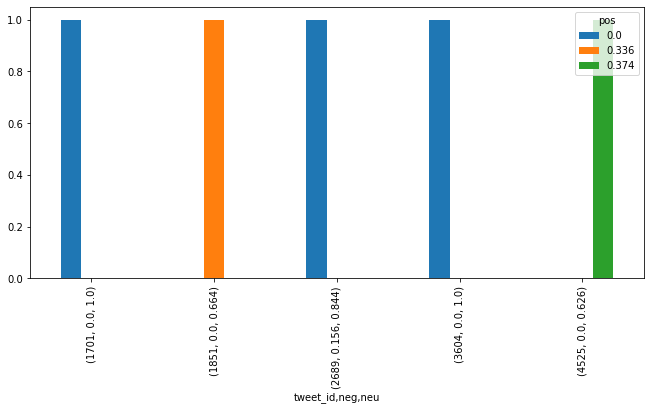

In [94]:
new_train.head().groupby(['tweet_id', 'neg','neu','pos']).size().unstack().plot(kind='bar',figsize=(11, 5))